# Exploratory Data Analysis
### Topics of Interest:
- Trends
- Correlations
- Fourier Transformations
- Feature Importance
- Possible Clustering

### Questions of Interest:
- What frequencies have the greatest power for air pollution time series?
- What is the relation of air pollution concentrations to temperatures (raw, [min, max, mean] on different time scales)?
- What is the relation of air pollution concentrations to radiation (raw, [min, max, mean] on different time scales)?
- How are different air pollutants related through time? Is there a lag between their correlations (implying it is predictive)?
- What features are most important for the prediction of air pollutant concentrations?
- Can data inputs be clustered to improve future machine learning models?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
import os

from datetime import datetime
from scipy.ndimage import *
from scipy.fftpack import *

# below is mainly for autotime assertion warnings
import warnings
warnings.filterwarnings("ignore")
sns.set_style('dark')

%load_ext autotime
%matplotlib inline

FILE = "cleaned_data.csv"
DIRI = "processed_data"

%pwd

'C:\\Users\\jimpg\\OneDrive\\Documents\\APWS\\jupyter'

In [2]:
file_path = os.path.join("..", DIRI, FILE)
df = pd.read_csv(file_path)
df

Unnamed: 0  Temperature (K)   Radiation    SO2    NO2     O3  \
0      2017-01-01 00:00:00        272.00818   61.362255  0.004  0.059  0.002   
1      2017-01-01 01:00:00        272.25480  171.832320  0.004  0.058  0.002   
2      2017-01-01 02:00:00        277.65262  299.281650  0.004  0.056  0.002   
3      2017-01-01 03:00:00        278.54010  390.387570  0.004  0.056  0.002   
4      2017-01-01 04:00:00        278.69528  378.793100  0.003  0.051  0.002   
...                    ...              ...         ...    ...    ...    ...   
25900  2019-12-31 19:00:00        267.61273    0.000000  0.003  0.026  0.014   
25901  2019-12-31 20:00:00        268.24185    0.000000  0.003  0.024  0.014   
25902  2019-12-31 21:00:00        268.46835    0.000000  0.003  0.014  0.021   
25903  2019-12-31 22:00:00        268.89783    0.000000  0.003  0.022  0.014   
25904  2019-12-31 23:00:00        268.99933    0.509965  0.004  0.035  0.005   

        CO  PM10  PM2.5  
0      1.2  73.0   57.0  
1      1.2  71.0   59.0  
2      1.2  70.0   59.0  
3      1.2  70.0   58.0  
4      1.2  69.0   61.0  
...    ...   ...    ...  
25900  0.5  26.0   19.0  
25901  0.4  27.0   19.0  
25902  0.4  23.0   18.0  
25903  0.5  20.0   19.0  
25904  0.5  20.0   15.0  

[25905 rows x 9 columns]

time: 52.7 ms


In [3]:
print(df.columns)
df.rename(columns = {'Unnamed: 0':'Time'}, inplace = True)
df

Index(['Unnamed: 0', 'Temperature (K)', 'Radiation', 'SO2', 'NO2', 'O3', 'CO',
       'PM10', 'PM2.5'],
      dtype='object')


Time  Temperature (K)   Radiation    SO2    NO2     O3  \
0      2017-01-01 00:00:00        272.00818   61.362255  0.004  0.059  0.002   
1      2017-01-01 01:00:00        272.25480  171.832320  0.004  0.058  0.002   
2      2017-01-01 02:00:00        277.65262  299.281650  0.004  0.056  0.002   
3      2017-01-01 03:00:00        278.54010  390.387570  0.004  0.056  0.002   
4      2017-01-01 04:00:00        278.69528  378.793100  0.003  0.051  0.002   
...                    ...              ...         ...    ...    ...    ...   
25900  2019-12-31 19:00:00        267.61273    0.000000  0.003  0.026  0.014   
25901  2019-12-31 20:00:00        268.24185    0.000000  0.003  0.024  0.014   
25902  2019-12-31 21:00:00        268.46835    0.000000  0.003  0.014  0.021   
25903  2019-12-31 22:00:00        268.89783    0.000000  0.003  0.022  0.014   
25904  2019-12-31 23:00:00        268.99933    0.509965  0.004  0.035  0.005   

        CO  PM10  PM2.5  
0      1.2  73.0   57.0  
1      1.2  71.0   59.0  
2      1.2  70.0   59.0  
3      1.2  70.0   58.0  
4      1.2  69.0   61.0  
...    ...   ...    ...  
25900  0.5  26.0   19.0  
25901  0.4  27.0   19.0  
25902  0.4  23.0   18.0  
25903  0.5  20.0   19.0  
25904  0.5  20.0   15.0  

[25905 rows x 9 columns]

time: 13 ms


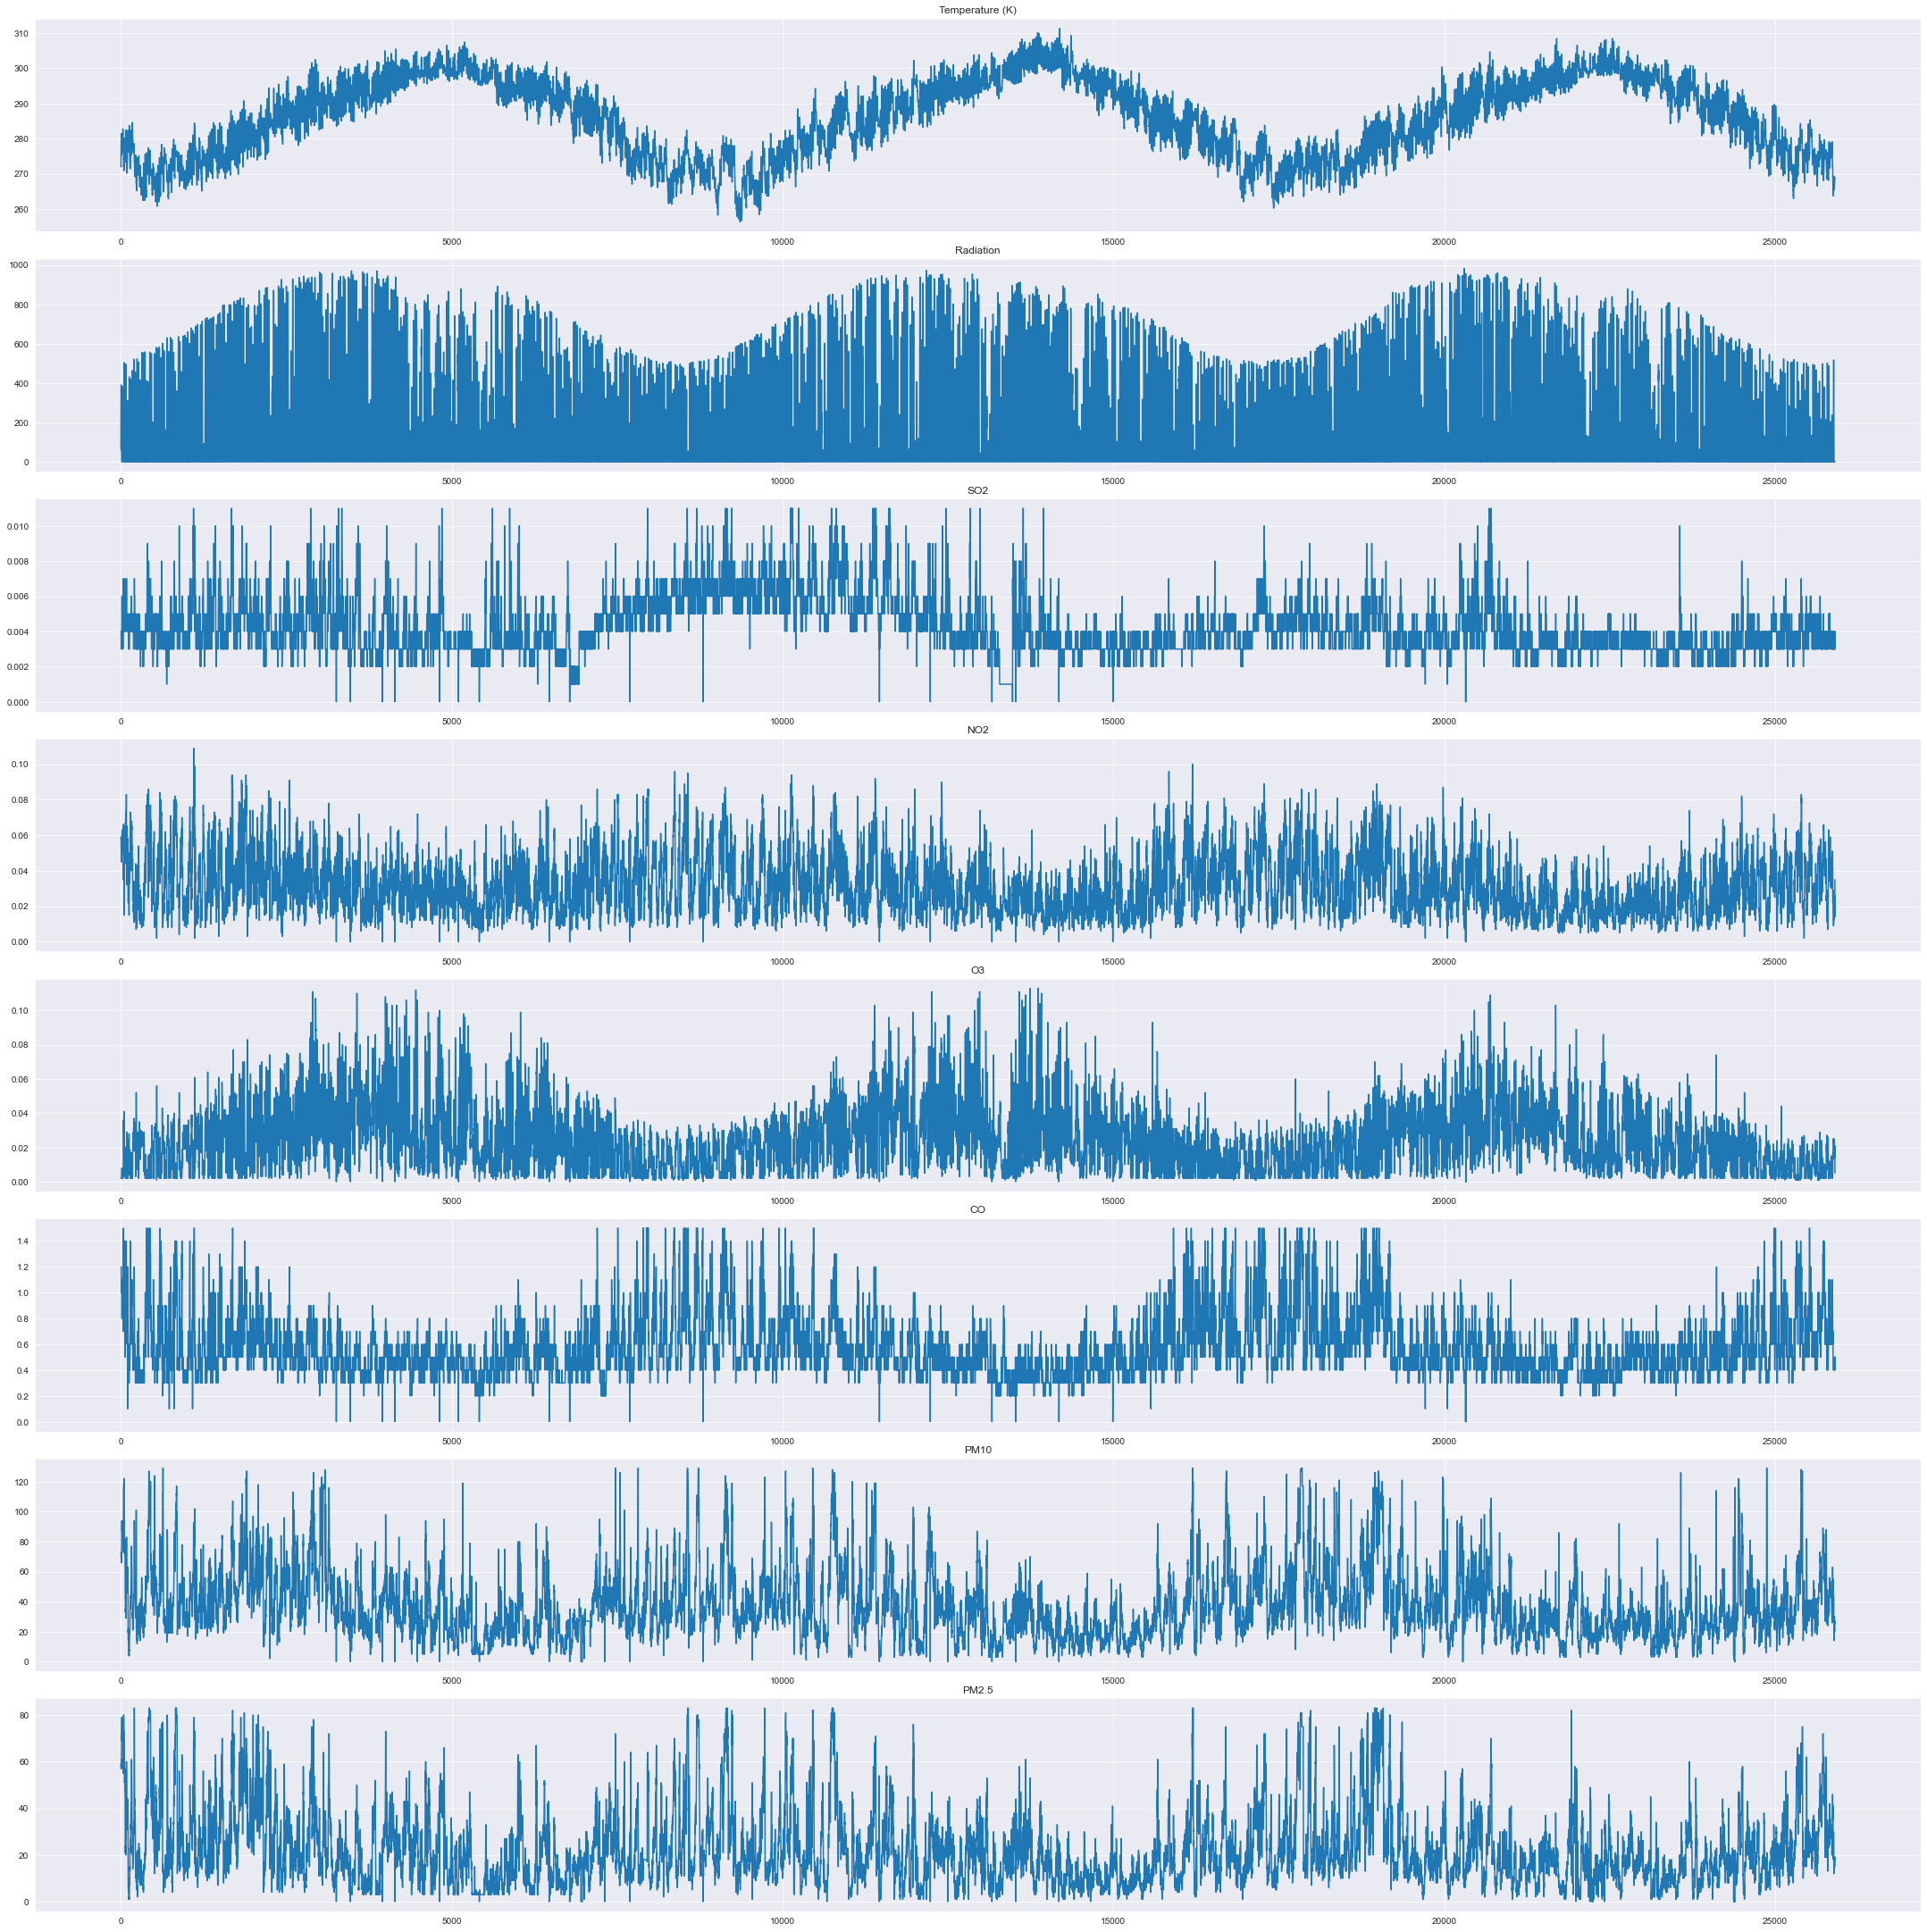

time: 1.36 s


In [4]:
components = ['Temperature (K)', 'Radiation', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

fig, axs = plt.subplots(8,1, figsize = (30, 30))
fig.tight_layout()

for idx, item in enumerate(components):
    axs[idx].plot(df[item]); plt.grid()
    axs[idx].set_title(item); axs[idx].grid()

### Trends


Temperature (K) parameters:
 const    284.142912
x1         0.000121
dtype: float64
Regression Start:  284.1429119404823 
Regression End:  287.27767578544143

Radiation parameters:
 const    191.605839
x1        -0.001073
dtype: float64
Regression Start:  191.60583865375122 
Regression End:  163.8166061264621

SO2 parameters:
 const    4.808495e-03
x1      -4.472461e-08
dtype: float64
Regression Start:  0.004808495322710897 
Regression End:  0.0036499489930582416

NO2 parameters:
 const    3.490243e-02
x1      -2.528553e-07
dtype: float64
Regression Start:  0.03490242778320493 
Regression End:  0.028352465094617883

O3 parameters:
 const    2.830619e-02
x1      -2.901536e-07
dtype: float64
Regression Start:  0.028306186971193362 
Regression End:  0.020790049276634914

CO parameters:
 const    5.652567e-01
x1       5.505604e-07
dtype: float64
Regression Start:  0.5652567114461713 
Regression End:  0.5795184284881978

PM10 parameters:
 const    42.224296
x1       -0.000390
dtype: float6

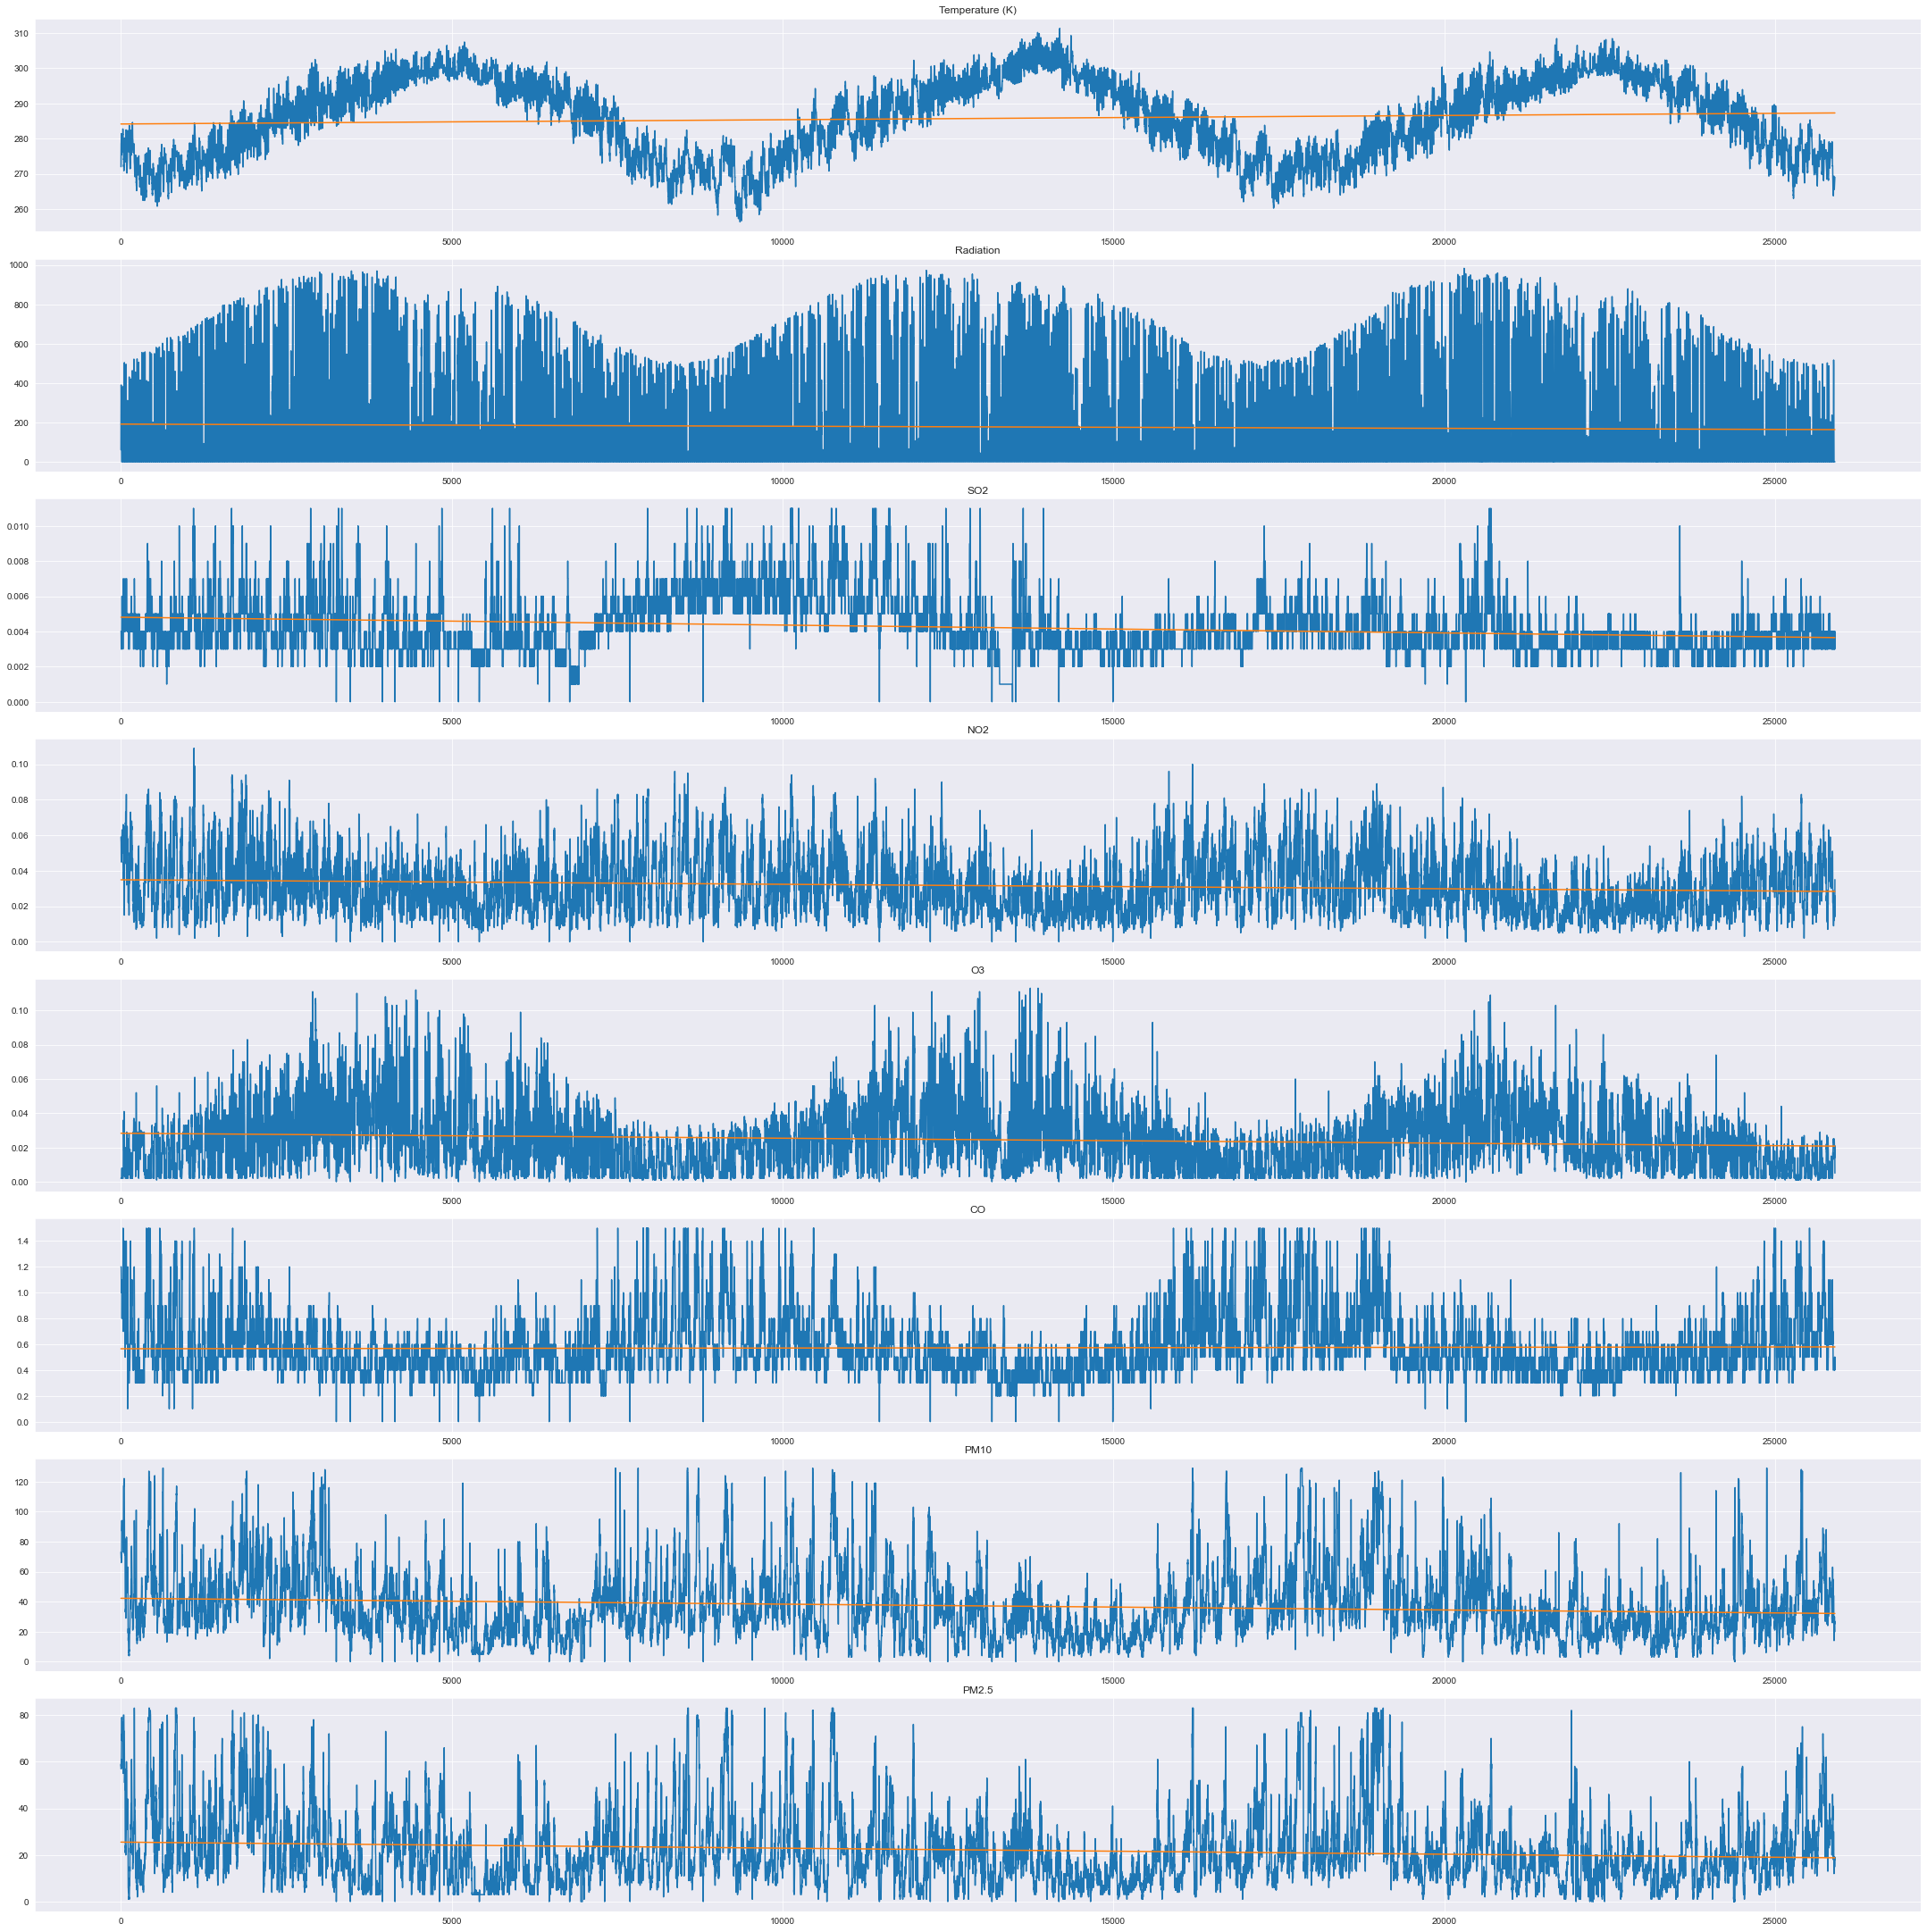

time: 1.76 s


In [5]:
fig, axs = plt.subplots(8,1, figsize = (30, 30))
fig.tight_layout()

for idx, item in enumerate(components):
    model = sm.OLS(df[item], sm.add_constant(df.index))
    beta = model.fit().params ; print(f"\n{item} parameters:\n", beta)
    print("Regression Start: ", beta["const"] + (beta["x1"] * df.index.min()), "\nRegression End: ",  beta["const"] + (beta["x1"] * df.index.max()))
    axs[idx].plot(df[item]); plt.grid()
    axs[idx].plot(beta["const"] + (beta["x1"] * df.index))
    axs[idx].set_title(item); axs[idx].grid()

From the values predicted by the regression models at the start and end of the time series, we can see that most are rather significant even though their slopes seem insignifcant. The linear regression for temperatures shows a 3 degree Kelvin increase over the three year time span. Radiation shows an extremem difference with a decrease of 30 W/m^2. Some of the air pollutants shows changes in concentration of around 50%. Some things that must be heavily considered:
- We are using a relatively short time series in a single location
- There could be end-point discontinuities (cycle ends abruptly without matching the point in the cycle it was at at the beginning of the time series. This is a concern when we do our fourier transform - we can use windowing to reduce spectral leakage)
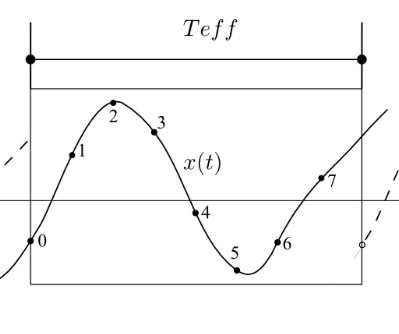
- Linear Regressions are obviously not the best method to use for sinusoidal time series data, we can try LOWESS and Fourier Transforms to get better fits

Temperature (K) Regression Values: 
Regression Start:  266.81342910776164 Regression End:  271.9728514981131
Regression Start:  274.12218308784026 Regression End:  272.54506056810516
Regression Start:  276.65864408076425 Regression End:  270.0224295932324
Radiation Regression Values: 
Regression Start:  89.84341677428297 Regression End:  69.40309274259585
Regression Start:  86.22942321440478 Regression End:  64.34053742115479
Regression Start:  93.79561912143507 Regression End:  52.078063202679544
SO2 Regression Values: 
Regression Start:  0.0041535509293599854 Regression End:  0.0037440711036421164
Regression Start:  0.004173438623650626 Regression End:  0.0038763279203564353
Regression Start:  0.004614597097526448 Regression End:  0.0034604970723163667
NO2 Regression Values: 
Regression Start:  0.038262594524656315 Regression End:  0.03737845496722244
Regression Start:  0.04085550567023403 Regression End:  0.03570797078050073
Regression Start:  0.0550593290389232 Regression End:  0.0

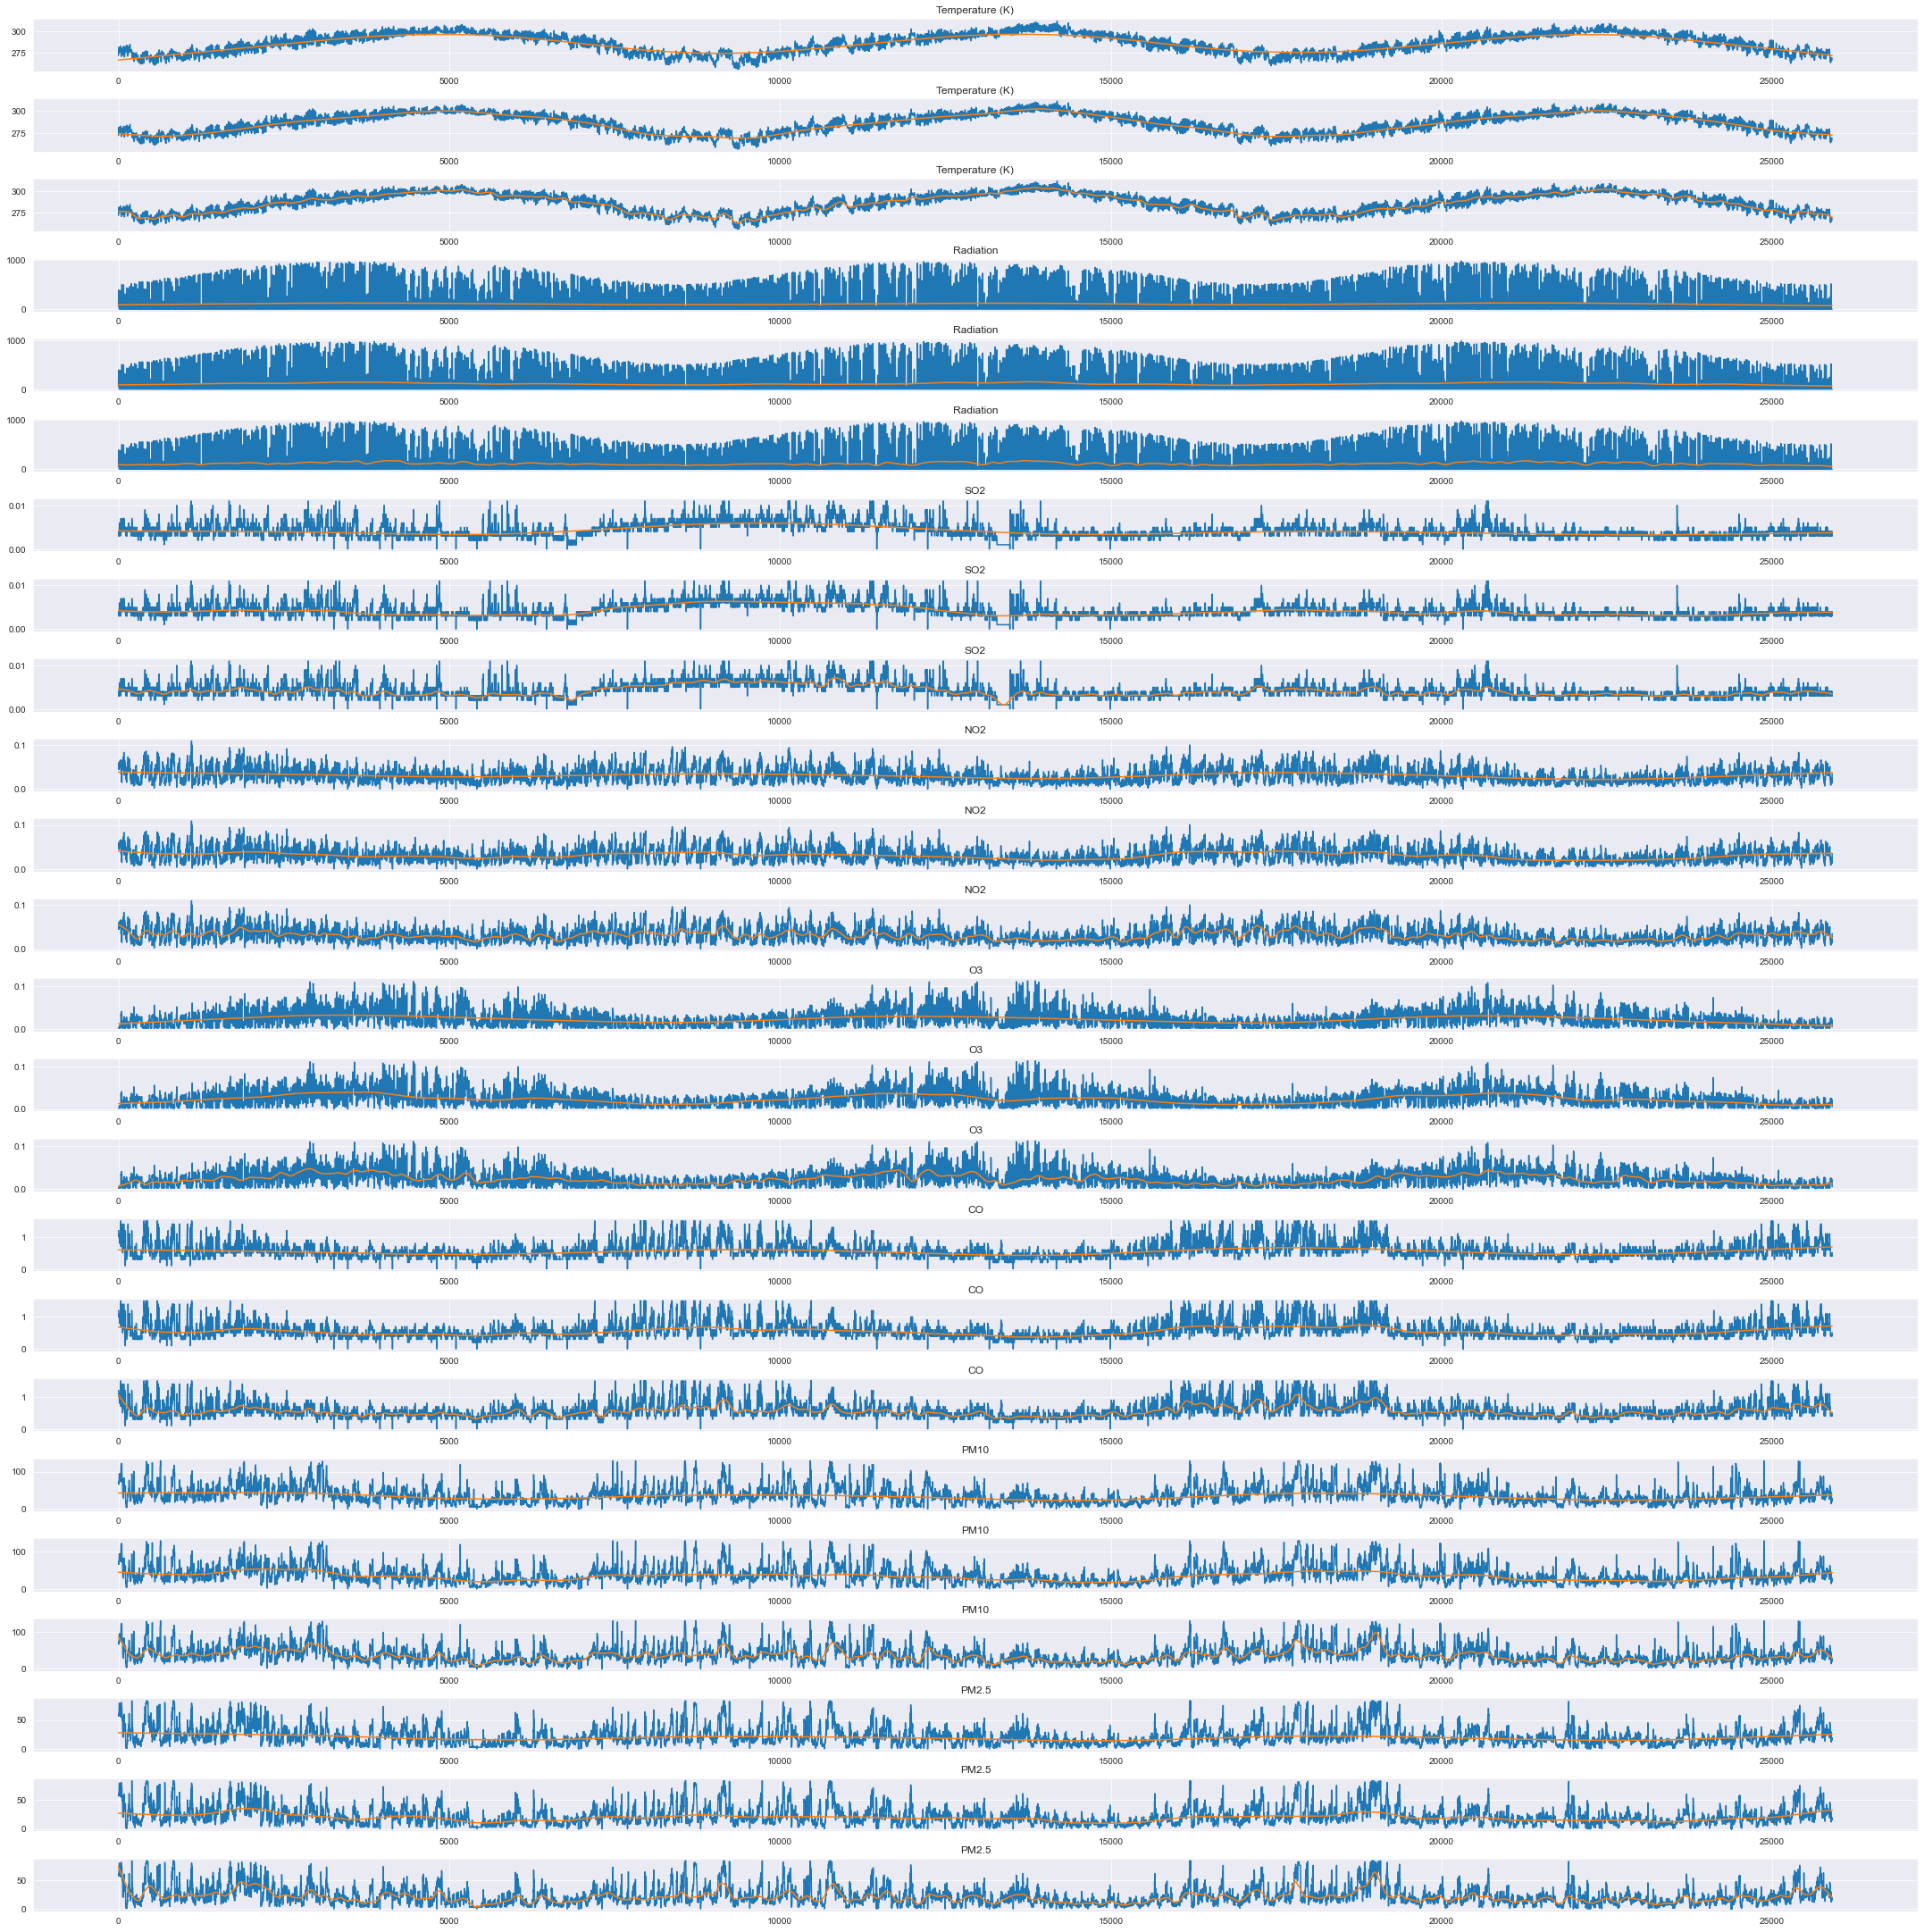

time: 3min 45s


In [6]:
# NOTE: this cell's runtime is ~ 4 minutes because it is running 24 LOWESS regressions
fig, axs = plt.subplots(24,1, figsize = (30, 30))
fig.tight_layout()

# determines strength of fit to local points, lower numbers indicate increased strength
frac_list = [0.2, 0.05, 0.01]

counter = 0
for item in components:
    print(f"{item} Regression Values: ")
    for f_val in frac_list:
        # https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
        lowess_model = sm.nonparametric.lowess(df[item], df.index, frac=f_val, return_sorted = False)
        print("Regression Start: ", lowess_model[0], "Regression End: ", lowess_model[-1])
        
        axs[counter].plot(df[item]); plt.grid()
        axs[counter].plot(lowess_model)
        axs[counter].set_title(item); axs[counter].grid()
        
        counter += 1    

We can add columns on to the dataframe that represent time in a different way. The datetime object is not very accessible for regression, but if we have numerical values for "day of year", "month of year", representing season using one-hot encoders, etc.

In [7]:
df["Time"] = pd.to_datetime(df["Time"])
# Note: Seoul is +9 hours from UTC, so 8 AM Seoul == 17 UTC, 8 PM Seoul == 5 UTC
# 5 <= night < 17 
df["Nighttime"] = 1*((df["Time"].dt.hour >= 5) & (df["Time"].dt.hour < 17))
df["Year"] = df["Time"].dt.year
df["Day of Month"] = df["Time"].dt.day
df["Day of Year"] = df["Time"].dt.dayofyear
df["Month of Year"] = df["Time"].dt.month
df["Season (Num)"] = df["Month of Year"]%12 // 3 + 1
df["Winter"] = 1*(df["Season (Num)"] == 1)
df["Spring"] = 1*(df["Season (Num)"] == 2)
df["Summer"] = 1*(df["Season (Num)"] == 3)
df["Fall"] = 1*(df["Season (Num)"] == 4)
df

Time  Temperature (K)   Radiation    SO2    NO2     O3  \
0     2017-01-01 00:00:00        272.00818   61.362255  0.004  0.059  0.002   
1     2017-01-01 01:00:00        272.25480  171.832320  0.004  0.058  0.002   
2     2017-01-01 02:00:00        277.65262  299.281650  0.004  0.056  0.002   
3     2017-01-01 03:00:00        278.54010  390.387570  0.004  0.056  0.002   
4     2017-01-01 04:00:00        278.69528  378.793100  0.003  0.051  0.002   
...                   ...              ...         ...    ...    ...    ...   
25900 2019-12-31 19:00:00        267.61273    0.000000  0.003  0.026  0.014   
25901 2019-12-31 20:00:00        268.24185    0.000000  0.003  0.024  0.014   
25902 2019-12-31 21:00:00        268.46835    0.000000  0.003  0.014  0.021   
25903 2019-12-31 22:00:00        268.89783    0.000000  0.003  0.022  0.014   
25904 2019-12-31 23:00:00        268.99933    0.509965  0.004  0.035  0.005   

        CO  PM10  PM2.5  Nighttime  Year  Day of Month  Day of Year  \
0      1.2  73.0   57.0          0  2017             1            1   
1      1.2  71.0   59.0          0  2017             1            1   
2      1.2  70.0   59.0          0  2017             1            1   
3      1.2  70.0   58.0          0  2017             1            1   
4      1.2  69.0   61.0          0  2017             1            1   
...    ...   ...    ...        ...   ...           ...          ...   
25900  0.5  26.0   19.0          0  2019            31          365   
25901  0.4  27.0   19.0          0  2019            31          365   
25902  0.4  23.0   18.0          0  2019            31          365   
25903  0.5  20.0   19.0          0  2019            31          365   
25904  0.5  20.0   15.0          0  2019            31          365   

       Month of Year  Season (Num)  Winter  Spring  Summer  Fall  
0                  1             1       1       0       0     0  
1                  1             1       1       0       0     0  
2                  1             1       1       0       0     0  
3                  1             1       1       0       0     0  
4                  1             1       1       0       0     0  
...              ...           ...     ...     ...     ...   ...  
25900             12             1       1       0       0     0  
25901             12             1       1       0       0     0  
25902             12             1       1       0       0     0  
25903             12             1       1       0       0     0  
25904             12             1       1       0       0     0  

[25905 rows x 19 columns]

time: 48 ms


### Correlations 
Which variables are most strongly covariated over the length of our time series?

In [8]:
corrs = df[['Temperature (K)', 'Radiation', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].corr()
corrs

Temperature (K)  Radiation       SO2       NO2        O3  \
Temperature (K)         1.000000   0.327442 -0.323313 -0.219107  0.211692   
Radiation               0.327442   1.000000 -0.115766 -0.052408 -0.204180   
SO2                    -0.323313  -0.115766  1.000000  0.415373  0.073214   
NO2                    -0.219107  -0.052408  0.415373  1.000000 -0.455648   
O3                      0.211692  -0.204180  0.073214 -0.455648  1.000000   
CO                     -0.341276  -0.029784  0.413599  0.817397 -0.400581   
PM10                   -0.285083  -0.052320  0.507411  0.505798  0.022536   
PM2.5                  -0.237646  -0.032402  0.479769  0.559960 -0.032469   

                       CO      PM10     PM2.5  
Temperature (K) -0.341276 -0.285083 -0.237646  
Radiation       -0.029784 -0.052320 -0.032402  
SO2              0.413599  0.507411  0.479769  
NO2              0.817397  0.505798  0.559960  
O3              -0.400581  0.022536 -0.032469  
CO               1.000000  0.601267  0.678054  
PM10             0.601267  1.000000  0.864130  
PM2.5            0.678054  0.864130  1.000000

time: 18 ms


[Text(0.5, 1.0, 'Air Pollutant Correlations')]

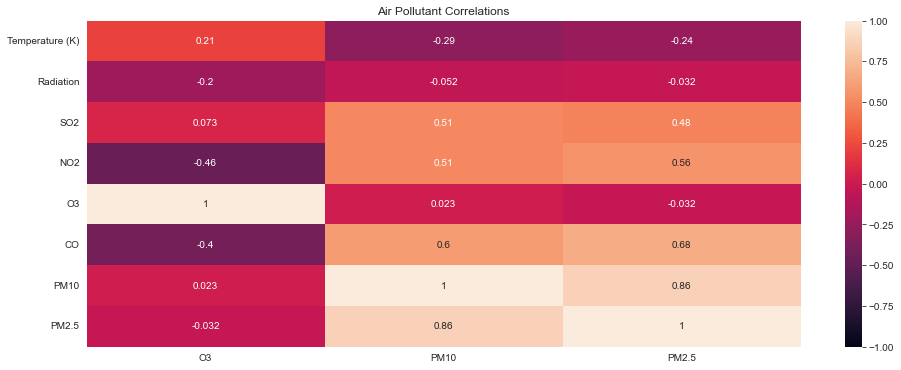

time: 167 ms


In [9]:
plt.figure(figsize=(16, 6))
sns.heatmap(corrs[['O3', 'PM10', 'PM2.5']], vmin=-1, vmax=1, annot=True).set(title='Air Pollutant Correlations')

- Temperature modestly correlates with ozone
- PM2.5, CO,NO2, and SO2 correlate strongly with PM10
- PM10, CO, NO2, and SO2 correlate strongly with PM2.5

In [10]:
for item in components:
    print(f"\n{item} Correlations:\n", corrs[item].sort_values(ascending=False))


Temperature (K) Correlations:
 Temperature (K)    1.000000
Radiation          0.327442
O3                 0.211692
NO2               -0.219107
PM2.5             -0.237646
PM10              -0.285083
SO2               -0.323313
CO                -0.341276
Name: Temperature (K), dtype: float64

Radiation Correlations:
 Radiation          1.000000
Temperature (K)    0.327442
CO                -0.029784
PM2.5             -0.032402
PM10              -0.052320
NO2               -0.052408
SO2               -0.115766
O3                -0.204180
Name: Radiation, dtype: float64

SO2 Correlations:
 SO2                1.000000
PM10               0.507411
PM2.5              0.479769
NO2                0.415373
CO                 0.413599
O3                 0.073214
Radiation         -0.115766
Temperature (K)   -0.323313
Name: SO2, dtype: float64

NO2 Correlations:
 NO2                1.000000
CO                 0.817397
PM2.5              0.559960
PM10               0.505798
SO2                0.4

### Fourier Analysis & Transform
What frequencies are the most important when fitting sinusoids to the air pollution time series? We can then use these these time scales for [min, max, mean] relationships between variables. These time scales could also be useful in figuring out how to cluster our data. 

#### Windowing to Reduce Spectral Leakage
We can use a "window" to taper out time series near the end points, which will make it periodic. This will give greater weighting to samples in the middle and reduce the resolution of our transformation, but will also reduce undesirable low-frequecy patterns that are a result of discontinuities. 

#### Zero Padding 
The FFT algorithm is most efficient when working with datasets of length 2^n. Zero padding can also increase resolution through increasing the number of frequency bins. 

In [11]:
from scipy.signal import get_window
from matplotlib.gridspec import GridSpec


# Finds the next power of 2 to use for zero paddin in FFT
def next_pow_2(x):
    return 1 if x==0 else 2**(math.ceil(math.log2(x)))



def fourier_pipeline(dfi, col):
    centered_dfi = dfi[col].values - dfi[col].mean()
    
    fig = plt.figure(figsize = (25, 18), constrained_layout=True)
    gs = GridSpec(8, 2, figure=fig)
    
    # GridSpec so a plot can span multiple subplot cells
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])
    ax7 = fig.add_subplot(gs[3, 0])
    ax8 = fig.add_subplot(gs[3, 1])
    ax9 = fig.add_subplot(gs[4, 0])
    ax10 = fig.add_subplot(gs[4, 1])
    ax11 = fig.add_subplot(gs[5:9, 0:2])

    
    # set the spacing between subplots
    plt.subplots_adjust(bottom=0.2, 
                        top=1, 
                        wspace=0.2, 
                        hspace=0.6)
    
    # need to specify length of time (N) and sampling frequency (dt)
    N = len(df)
    dt = 1 # hourly
    
    # FFT
    dfi_freq = fft(centered_dfi)
    dfi_hour = fftfreq(N, dt)
    dfi_ifft = ifft(dfi_freq)
    
    # Windowed FFT
    w = get_window('hann', N)
    dfi_freq_windowed = fft(centered_dfi * w)
    df_ifft_windowed = ifft(dfi_freq_windowed)
    
    # Padded FFT
    N_padded = next_pow_2(N)
    dfi_padded_hour = fftfreq(N_padded, dt)
    dfi_freq_padded = fft(centered_dfi, N_padded)
    dfi_ifft_padded = ifft(dfi_freq_padded)
    
    # Windowed & Padded
    dfi_freq_padded_windowed = fft(centered_dfi * w, N_padded)
    dfi_ifft_padded_windowed = ifft(dfi_freq_padded_windowed)


    for freq_x in [dfi_freq, dfi_freq_windowed]:
        # Show highest powered frequencies
        max_indices = np.argpartition(2.0/N * np.abs(freq_x[0:N//2]), -5)[-5:]

        for idx in max_indices[::-1]:
            print("\nFrequency: ", dfi_hour[idx],
                 "\nLength of Hour Cycle: ", 1/dfi_hour[idx], 
                 "\nCycle in Days: ", (1/dfi_hour[idx])/24, 
                 "\nAmplitude: ", 2.0/N * np.abs(freq_x[idx]))
            
    for freq_x in [dfi_freq_padded, dfi_freq_padded_windowed]:
        # Show highest powered frequencies
        max_indices = np.argpartition(2.0/N * np.abs(freq_x[0:N//2]), -5)[-5:]
                
        for idx in max_indices[::-1]:
            print("\nFrequency: ", dfi_padded_hour[idx],
                 "\nLength of Hour Cycle: ", 1/dfi_padded_hour[idx], 
                 "\nCycle in Days: ", (1/dfi_padded_hour[idx])/24, 
                 "\nAmplitude: ", 2.0/N * np.abs(freq_x[idx]))
    
    
    # FFT Frequency Domain
    ax1.plot(dfi_hour[0:N//2], 2.0/N * np.abs(dfi_freq[0:N//2])); plt.grid()
    ax1.set_title(f"Frequency Amplitude for {col}"); ax1.grid()
    ax1.set_xlabel("Frequency (Hour^-1)"); ax1.set_ylabel("Amplitude")

    ax2.plot(dfi_ifft); plt.grid()
    ax2.set_title(f"IFFT of Original {col} FFT"); ax2.grid()
    ax2.set_xlabel("Time (Hour)"); ax2.set_ylabel("Concentration")
    
    
    # Windowed FFT Frequency Domain
    ax3.plot(dfi_hour[0:N//2], 2.0/N * np.abs(dfi_freq_windowed[0:N//2])); plt.grid()
    ax3.set_title(f"Frequency Amplitude for {col}, Windowed"); ax3.grid()
    ax3.set_xlabel("Frequency (Hour^-1)"); ax3.set_ylabel("Amplitude")
    
    ax4.plot(df_ifft_windowed); plt.grid()
    ax4.set_title(f"IFFT of Windowed {col} FFT"); ax4.grid()
    ax4.set_xlabel("Time (Hour)"); ax4.set_ylabel("Concentration")
    
    
    # Padded FFT Frequency Domain
    ax5.plot(dfi_padded_hour[0:N//2], 2.0/N * np.abs(dfi_freq_padded[0:N//2])); plt.grid()
    ax5.set_title(f"Frequency Amplitude for {col}, Padded"); ax5.grid()
    ax5.set_xlabel("Frequency (Hour^-1)"); ax5.set_ylabel("Amplitude")
    
    # NOTE: since this data was padded, it is a different length from the original time series
    ax6.plot(dfi_ifft_padded); plt.grid()
    ax6.set_title(f"IFFT of Padded {col} FFT"); ax6.grid()
    ax6.set_xlabel("Time (Hour)"); ax6.set_ylabel("Concentration")
    
    
    # Padded, Windowed FFT Frequency Domain
    ax7.plot(dfi_padded_hour[0:N//2], 2.0/N * np.abs(dfi_freq_padded_windowed[0:N//2])); plt.grid()
    ax7.set_title(f"Frequency Amplitude for {col}, Padded & Windowed"); ax7.grid()
    ax7.set_xlabel("Frequency (Hour^-1)"); ax7.set_ylabel("Amplitude")
    
    # NOTE: since this data was padded, it is a different length from the original time series
    ax8.plot(dfi_ifft_padded_windowed); plt.grid()
    ax8.set_title(f"IFFT of Padded & Windowed {col} FFT"); ax8.grid()
    ax8.set_xlabel("Time (Hour)"); ax8.set_ylabel("Concentration")
    
    
    # Residuals between IFFT and Original Time Series
    dfi_residuals = dfi[col] - dfi_ifft
    ax9.plot(dfi_residuals); plt.grid()
    ax9.set_title(f"Residuals of {col} Time Series & Original IFFT"); ax9.grid()
    ax9.set_xlabel("Time (Hour)"); ax9.set_ylabel("Concentration")
    
    # Residuals between Windowed IFFT and Original Time Series
    dfi_windowed_residuals = dfi[col] - df_ifft_windowed
    ax10.plot(dfi_windowed_residuals); plt.grid()
    ax10.set_title(f"Residuals of {col} Time Series & Windowed IFFT"); ax10.grid()
    ax10.set_xlabel("Time (Hour)"); ax10.set_ylabel("Concentration")
    
    
    # Frequencies of all FFTs
    ax11.plot(dfi_hour[0:N//2], 2.0/N * np.abs(dfi_freq[0:N//2]), label="Original", alpha=0.5)
    ax11.plot(dfi_hour[0:N//2], 2.0/N * np.abs(dfi_freq_windowed[0:N//2]), label="Windowed", alpha=0.5)
    ax11.plot(dfi_padded_hour[0:N//2], 2.0/N * np.abs(dfi_freq_padded[0:N//2]), label="Padded", alpha=0.5)
    ax11.plot(dfi_padded_hour[0:N//2], 2.0/N * np.abs(dfi_freq_padded_windowed[0:N//2]), label="Windowed & Padded", alpha=0.5)
    ax11.set_title('Frequency Domain')
    ax11.set_xlabel("Frequency")
    ax11.set_ylabel("Amplitude")
    ax11.legend(frameon=False)

time: 4 ms



Frequency:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  0.012595595243823358

Frequency:  0.04169079328314997 
Length of Hour Cycle:  23.98611111111111 
Cycle in Days:  0.9994212962962963 
Amplitude:  0.00803802025982488

Frequency:  0.041652190696776684 
Length of Hour Cycle:  24.008341056533826 
Cycle in Days:  1.0003475440222427 
Amplitude:  0.005345294266125753

Frequency:  0.04157498552403011 
Length of Hour Cycle:  24.05292479108635 
Cycle in Days:  1.0022051996285979 
Amplitude:  0.004624596903646487

Frequency:  0.08334298397992665 
Length of Hour Cycle:  11.998610467809172 
Cycle in Days:  0.49994210282538215 
Amplitude:  0.0038703724872687886

Frequency:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  0.0060644934502857755

Frequency:  0.04169079328314997 
Length of Hour Cycle:  23.98611111111111 
Cycle in Days:  0.9994212962962963 
Amplitude:  0.00481640652905747

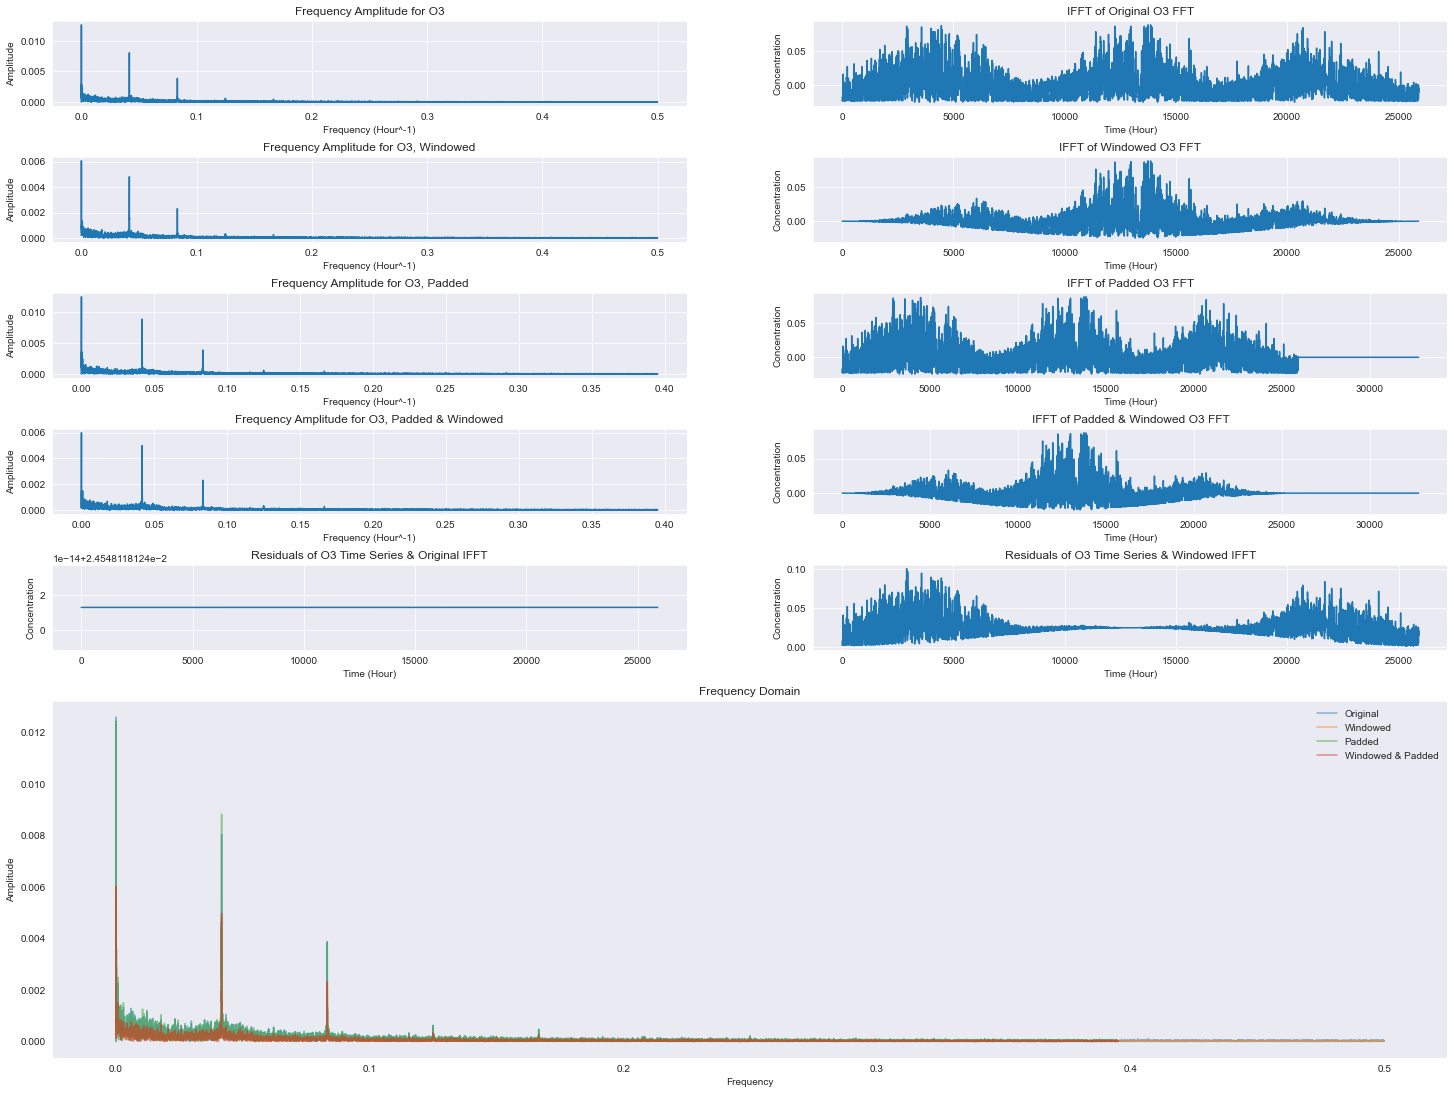

time: 1.08 s


In [12]:
fourier_pipeline(df, "O3")


Frequency:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  8.651071491212582

Frequency:  0.0006948465547191662 
Length of Hour Cycle:  1439.1666666666667 
Cycle in Days:  59.96527777777778 
Amplitude:  2.851900535185476

Frequency:  0.0018529241459177765 
Length of Hour Cycle:  539.6875 
Cycle in Days:  22.486979166666668 
Amplitude:  2.8141686068709895

Frequency:  0.0007720517274657402 
Length of Hour Cycle:  1295.25 
Cycle in Days:  53.96875 
Amplitude:  2.5892266104701696

Frequency:  0.0004246284501061571 
Length of Hour Cycle:  2355.0 
Cycle in Days:  98.125 
Amplitude:  2.4139861528764124

Frequency:  0.00015441034549314804 
Length of Hour Cycle:  6476.25 
Cycle in Days:  269.84375 
Amplitude:  1.8649351939686385

Frequency:  7.720517274657402e-05 
Length of Hour Cycle:  12952.5 
Cycle in Days:  539.6875 
Amplitude:  2.155865028297066

Frequency:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7

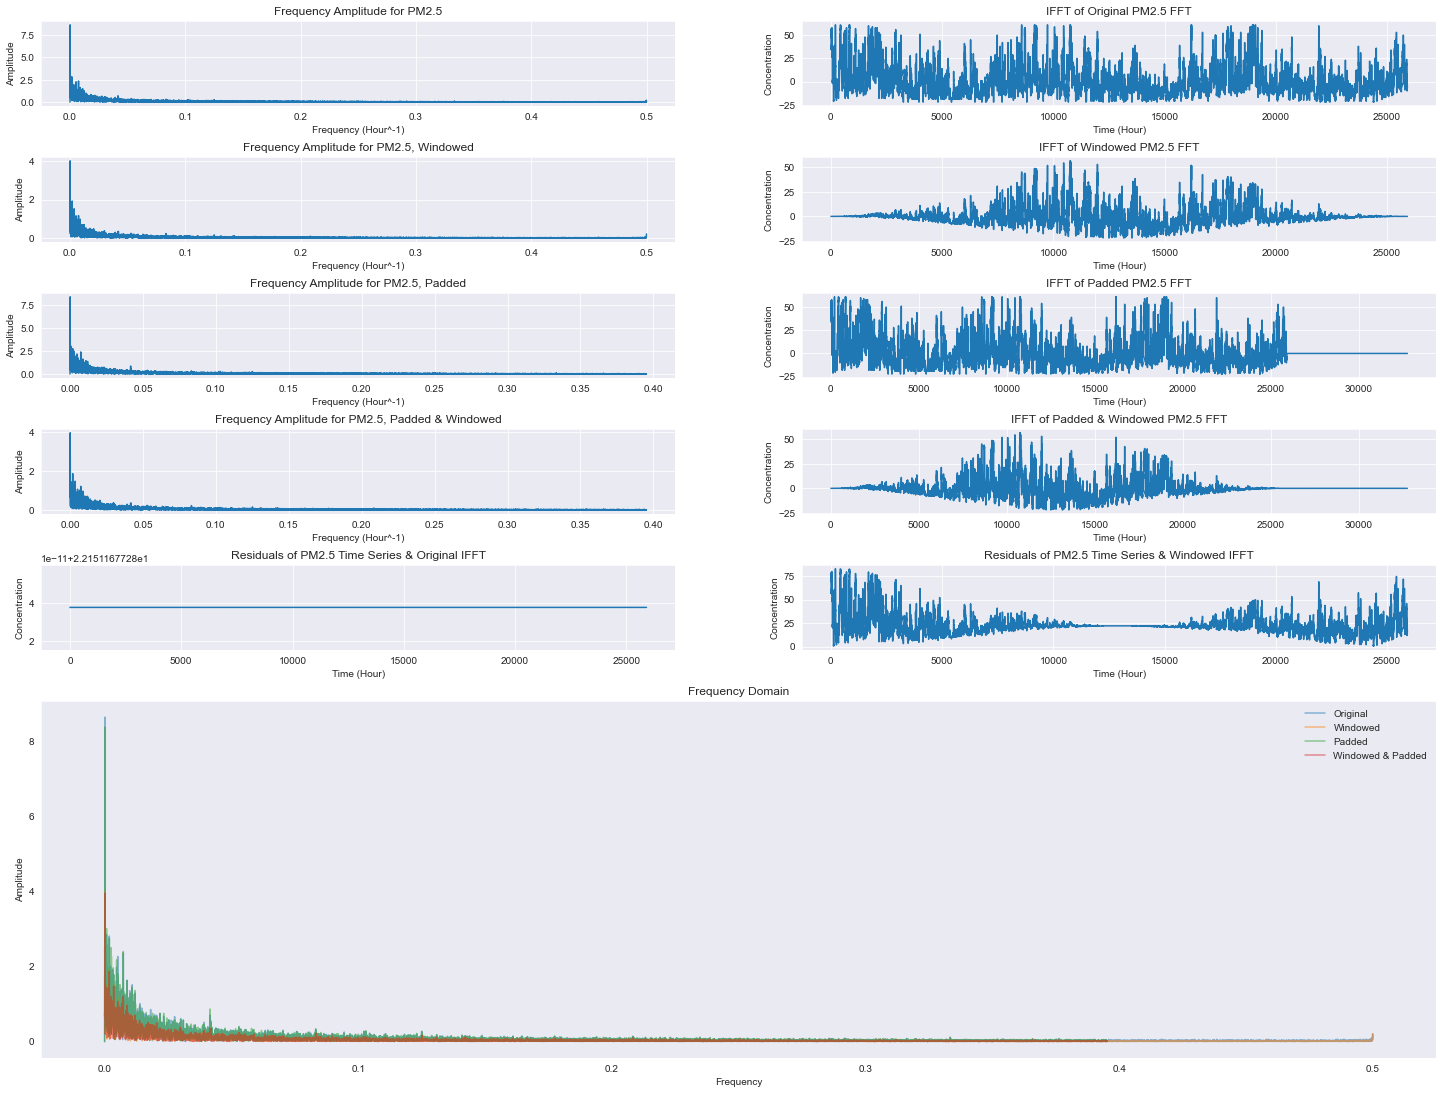

time: 1.18 s


In [13]:
fourier_pipeline(df, "PM2.5")


Frequency:  0.007373093997297819 
Length of Hour Cycle:  135.6282722513089 
Cycle in Days:  5.651178010471205 
Amplitude:  3.276534972599246

Frequency:  0.00011580775911986103 
Length of Hour Cycle:  8635.0 
Cycle in Days:  359.7916666666667 
Amplitude:  14.746635560688146

Frequency:  0.0006948465547191662 
Length of Hour Cycle:  1439.1666666666667 
Cycle in Days:  59.96527777777778 
Amplitude:  3.1819222596569343

Frequency:  0.0018529241459177765 
Length of Hour Cycle:  539.6875 
Cycle in Days:  22.486979166666668 
Amplitude:  3.856204696495815

Frequency:  0.0018143215595444896 
Length of Hour Cycle:  551.1702127659574 
Cycle in Days:  22.965425531914892 
Amplitude:  3.098148984482407

Frequency:  0.00015441034549314804 
Length of Hour Cycle:  6476.25 
Cycle in Days:  269.84375 
Amplitude:  4.001152358407229

Frequency:  7.720517274657402e-05 
Length of Hour Cycle:  12952.5 
Cycle in Days:  539.6875 
Amplitude:  3.617812719146132

Frequency:  0.00011580775911986103 
Length of Hou

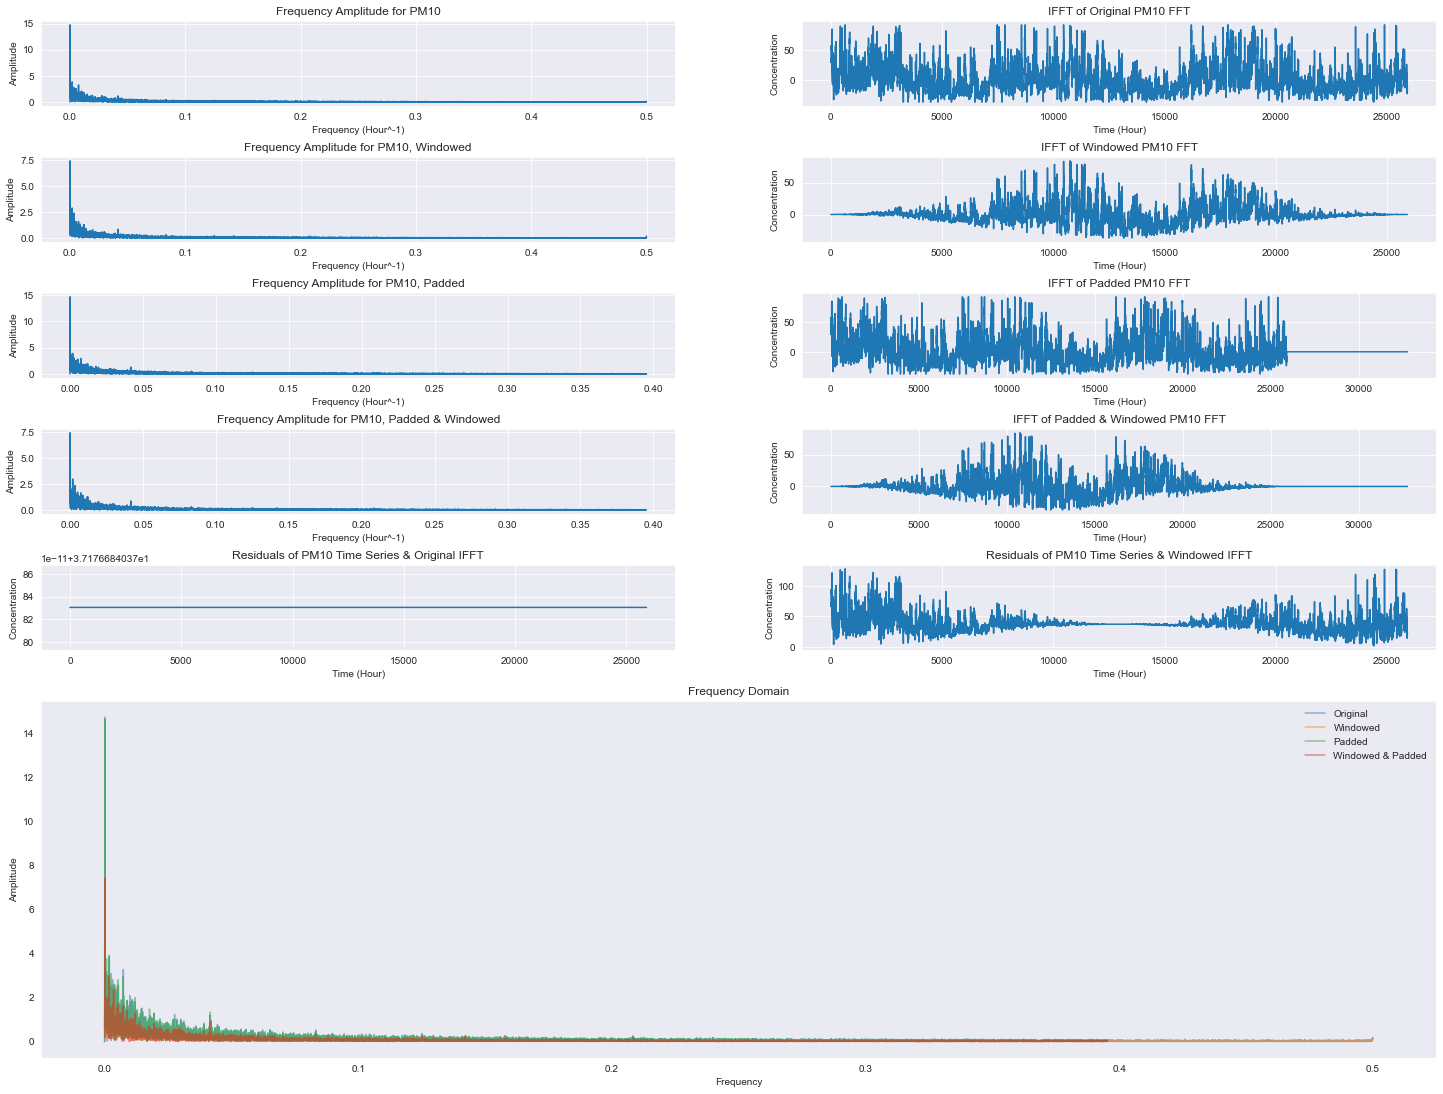

time: 1.09 s


In [14]:
fourier_pipeline(df, "PM10")

##### O3:
The residual for the standard IFFT are ridiculously low, so we can be assured that the frequencies pulled out by the FFT are accurate. Removing the trend from the data reduces the amplitude at frequency 0. The frequency with the greatest amplitude (by far) is 1/8635, which is equivalent to a cycle length of approximately 359 days. The next few are frequencies with a cycle length of about 1 day. The last appears to be the diurnal cycle (12-hour period), but this frequency has a very weak amplitude. We can use these time frames to inform which features on which time scales we use as predictors in our machine learning model.

The windowed FFT returns similar frequencies, with the yearly having the greatest amplitude by far. Daily frequencies are the second most important group. The last two frequencies seen, 269 and 539 days, have low magnitudes and do not make intuitive sense. Since these did not show up in the original FFT, we can assume they are products of distortion by windowing. 

##### PM 2.5:

##### PM 10:

### Derived Features
All methods show the same frequencies dominating, so we can be very confident that the yearly and daily are the most important timeframes.The padded frequencies seem to also include a peak around a frequency with cycle length of 269 days. We can investigate this further to see if this is an important time frame, but at the moment there is no intuitive explaination besides distortion from padding and windowing. 

We can derive some features using the [mean, min, max] over time frames that the FFT showed as important, especially daily and yearly.

In [15]:
diurnal_grouped = df[components].groupby([df["Year"], df["Day of Year"], df["Nighttime"]])
daily_grouped = df[components].groupby([df["Year"], df["Day of Year"]])
seasonal_grouped = df[components].groupby([df["Year"], df["Season (Num)"]])
yearly_grouped = df[components].groupby(df["Year"])

time: 11 ms


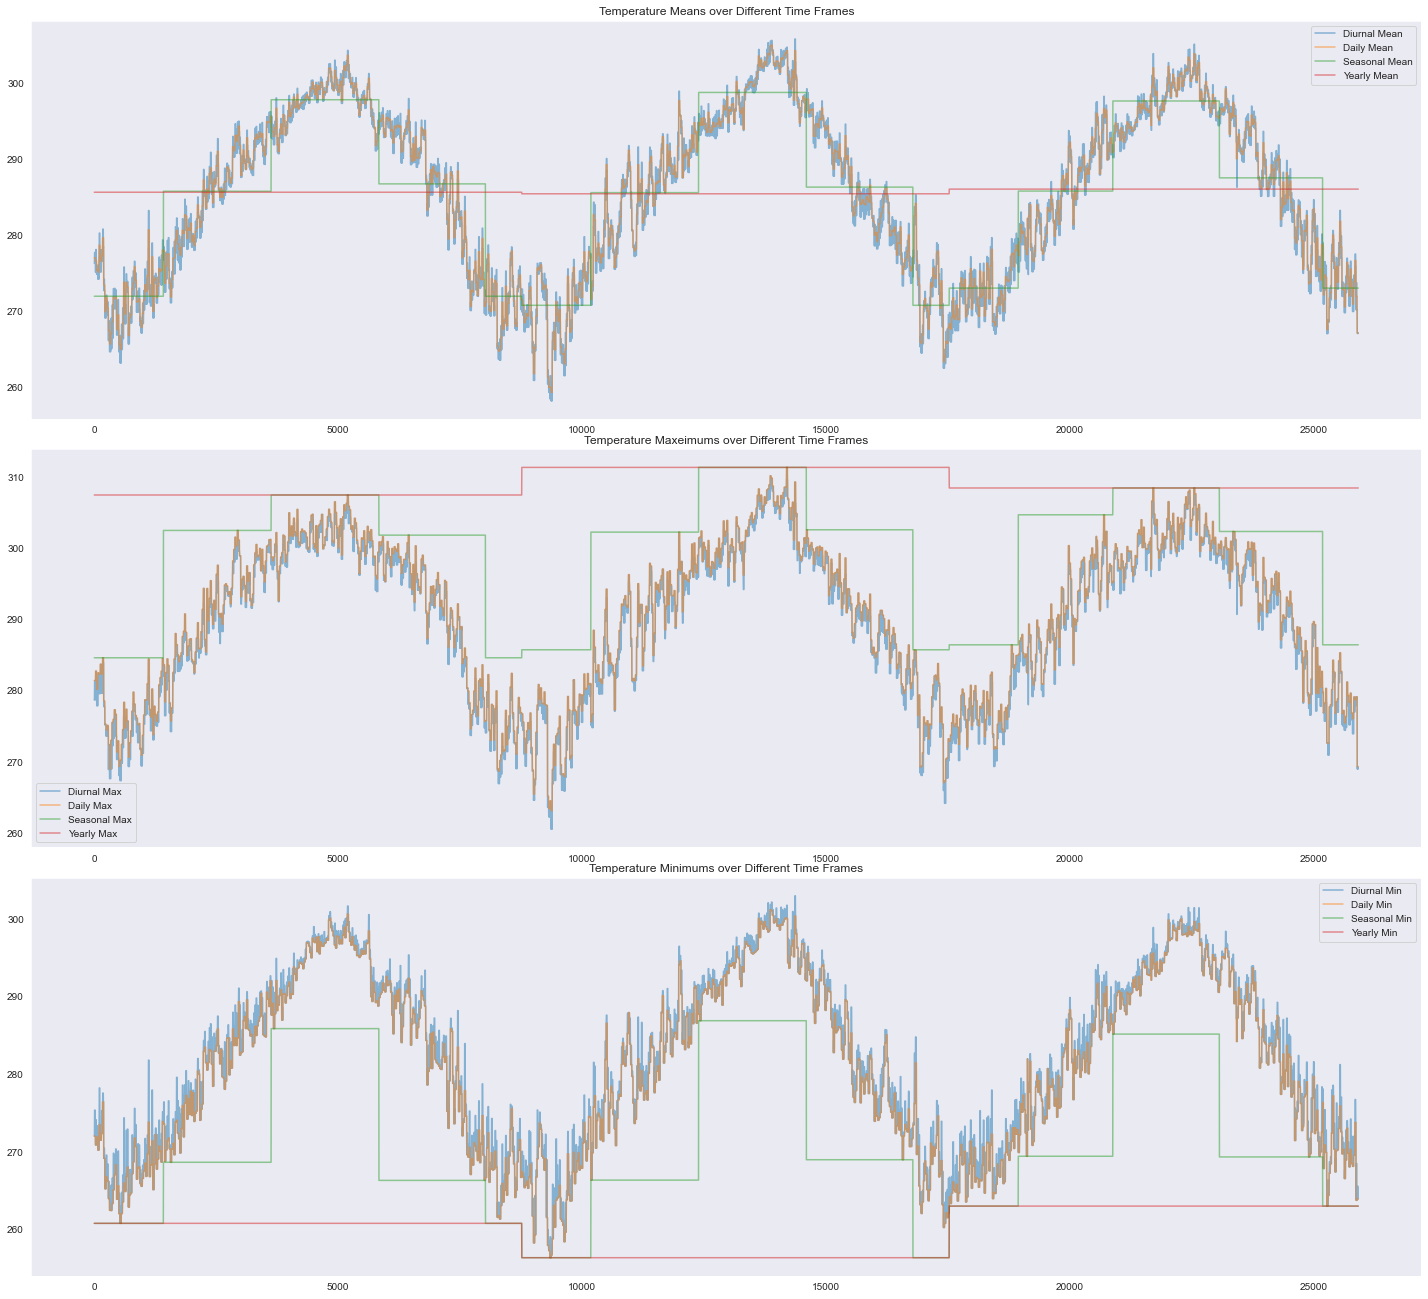

time: 620 ms


In [16]:
fig, axs = plt.subplots(3,1, figsize = (20, 18))
fig.tight_layout()

axs[0].plot(diurnal_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Diurnal Mean")
axs[0].plot(daily_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Daily Mean")
axs[0].plot(seasonal_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Seasonal Mean")
axs[0].plot(yearly_grouped.transform('mean')['Temperature (K)'], alpha=0.5, label="Yearly Mean")
axs[0].set_title("Temperature Means over Different Time Frames")
axs[0].legend()

axs[1].plot(diurnal_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Diurnal Max")
axs[1].plot(daily_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Daily Max")
axs[1].plot(seasonal_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Seasonal Max")
axs[1].plot(yearly_grouped.transform('max')['Temperature (K)'], alpha=0.5, label="Yearly Max")
axs[1].set_title("Temperature Maxeimums over Different Time Frames")
axs[1].legend()

axs[2].plot(diurnal_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Diurnal Min")
axs[2].plot(daily_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Daily Min")
axs[2].plot(seasonal_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Seasonal Min")
axs[2].plot(yearly_grouped.transform('min')['Temperature (K)'], alpha=0.5, label="Yearly Min")
axs[2].set_title("Temperature Minimums over Different Time Frames")
axs[2].legend()

plt.legend()

In [17]:
for item in components:
    for stat in ["mean", "min", "max"]:
        df[f"{item}_diurnal_{stat}"] = diurnal_grouped.transform(stat)[item]
        df[f"{item}_daily_{stat}"] = daily_grouped.transform(stat)[item]
        df[f"{item}_seasonal_{stat}"] = seasonal_grouped.transform(stat)[item]
        df[f"{item}_yearly_{stat}"] = yearly_grouped.transform(stat)[item]

time: 183 ms


### Correlations and Cross-Correlations

We will use Pearson Correlation to see which variablles are linearly correlates with the three pollutants we are interested in. Then, we will see what the cross correlations are for these variables and what lag shows the greatest correlation. The cross correlation will be important for figuring out which features are important for a machine learning model since it shows how previous data informs the future state of our features of interest. 

[Text(0.5, 1.0, 'Air Pollutant Correlations')]

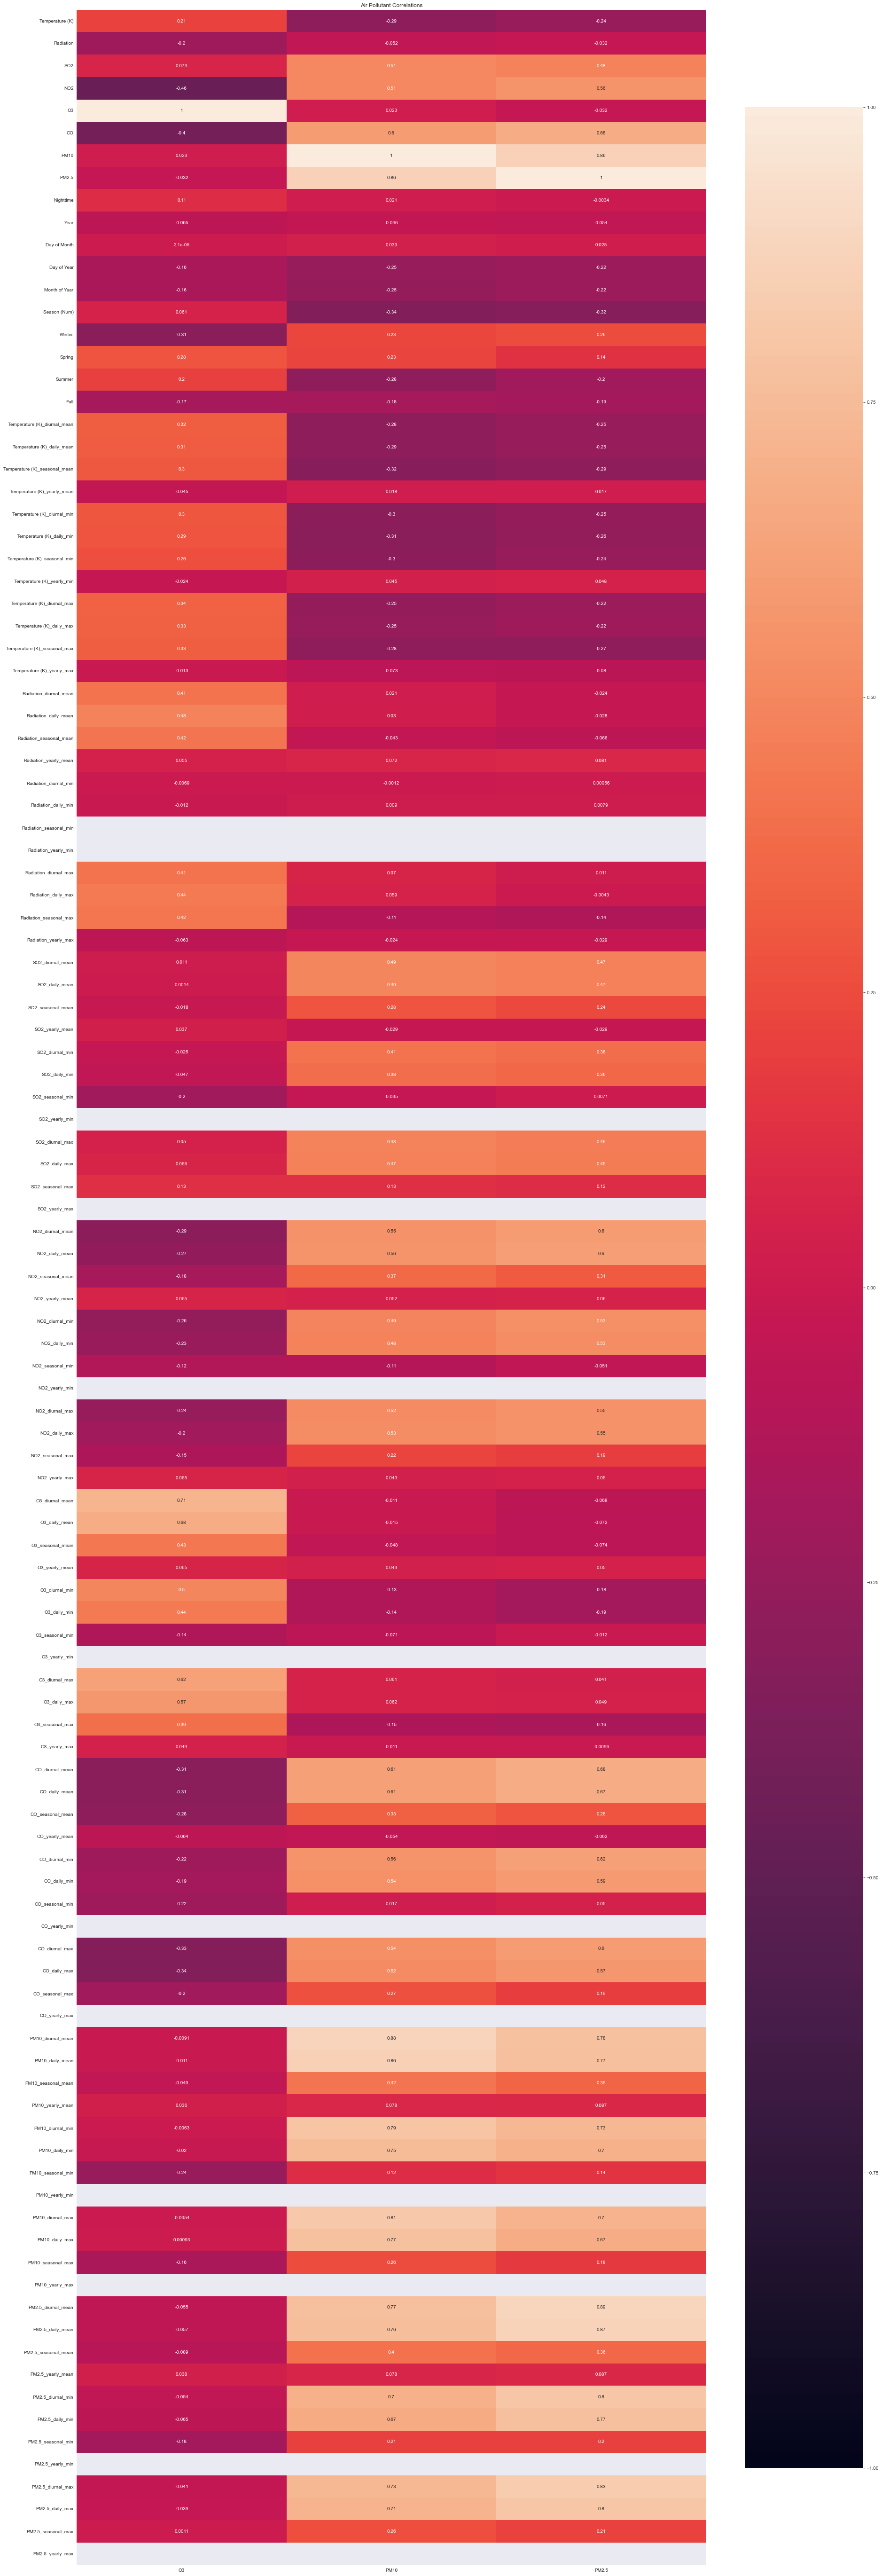

time: 2.51 s


In [18]:
plt.figure(figsize=(30, 100))
extended_corrs = df.corr()
sns.heatmap(extended_corrs[['O3', 'PM10', 'PM2.5']], vmin=-1, vmax=1, annot=True).set(title='Air Pollutant Correlations')

In [21]:
def cross_corr_pipeline(col, extended_corrs):
    
    # Sort by highest Pearson correlations that is not derived from col
    corr = pd.DataFrame(extended_corrs[col].sort_values(ascending=False, key=lambda x: abs(x)))
    corr_ri = corr.reset_index()
    variables = [x for x in corr_ri["index"] if x[0:len(col)] != col]
    corr_ri.rename(columns={"index":"variable"}, inplace=True)
    corr_ri = corr_ri[corr_ri.variable.isin(variables)] # removes variables related to itself
    highest_corr = corr_ri.head(50)
    print(f"{col} Pearson Correlations:\n", highest_corr)
    
    max_corrs = pd.DataFrame(index=range(len(highest_corr)), columns=["Var", "Corr", "Lag"])
    
    for idx, var in enumerate(highest_corr["variable"]):
        cross_corr = sm.tsa.stattools.ccf(df[col], df[var], adjusted=False)
        max_idx = abs(cross_corr).argmax()

        max_corrs["Var"][idx] = var
        max_corrs["Corr"][idx] = cross_corr[max_idx]
        max_corrs["Lag"][idx] = max_idx

    max_corrs.sort_values(by=["Corr", "Lag"], ascending=False, key=lambda x: abs(x))
    print(f"\n{col} Cross Correlations:\n", max_corrs)
    

time: 1 ms


In [22]:
cross_corr_pipeline("O3", extended_corrs)

O3 Pearson Correlations:
                          variable        O3
6            Radiation_daily_mean  0.480668
7                             NO2 -0.455648
9             Radiation_daily_max  0.438868
11         Radiation_seasonal_max  0.422370
12        Radiation_seasonal_mean  0.421292
13         Radiation_diurnal_mean  0.411888
14          Radiation_diurnal_max  0.410064
15                             CO -0.400581
17    Temperature (K)_diurnal_max  0.343290
18                   CO_daily_max -0.341282
19      Temperature (K)_daily_max  0.334389
20                 CO_diurnal_max -0.330463
21   Temperature (K)_seasonal_max  0.326337
22   Temperature (K)_diurnal_mean  0.322587
23     Temperature (K)_daily_mean  0.314705
24                CO_diurnal_mean -0.308159
25                         Winter -0.305703
26                  CO_daily_mean -0.305012
27  Temperature (K)_seasonal_mean  0.298668
28    Temperature (K)_diurnal_min  0.296735
29               NO2_diurnal_mean -0.293336
30    

In [23]:
cross_corr_pipeline("PM2.5", extended_corrs)

PM2.5 Pearson Correlations:
                          variable     PM2.5
3                            PM10  0.864130
7               PM10_diurnal_mean  0.779533
8                 PM10_daily_mean  0.768244
10               PM10_diurnal_min  0.727341
11               PM10_diurnal_max  0.704667
12                 PM10_daily_min  0.696588
13                             CO  0.678054
14                CO_diurnal_mean  0.675851
15                  CO_daily_mean  0.673344
16                 PM10_daily_max  0.672367
17                 CO_diurnal_min  0.616977
18                 NO2_daily_mean  0.604110
19                 CO_diurnal_max  0.595872
20               NO2_diurnal_mean  0.595103
21                   CO_daily_min  0.590869
22                   CO_daily_max  0.571000
23                            NO2  0.559960
24                  NO2_daily_max  0.551165
25                NO2_diurnal_max  0.547331
26                NO2_diurnal_min  0.532805
27                  NO2_daily_min  0.529935
28 

In [25]:
cross_corr_pipeline("PM10", extended_corrs)

PM10 Pearson Correlations:
                          variable      PM10
2                           PM2.5  0.864130
7              PM2.5_diurnal_mean  0.773081
8                PM2.5_daily_mean  0.758777
10              PM2.5_diurnal_max  0.728415
11                PM2.5_daily_max  0.708387
12              PM2.5_diurnal_min  0.698677
13                PM2.5_daily_min  0.671694
14                CO_diurnal_mean  0.610512
15                  CO_daily_mean  0.610371
16                             CO  0.601267
17                 CO_diurnal_min  0.560182
18                 NO2_daily_mean  0.557962
19               NO2_diurnal_mean  0.547895
20                   CO_daily_min  0.541571
21                 CO_diurnal_max  0.537656
22                  NO2_daily_max  0.529733
23                   CO_daily_max  0.521932
24                NO2_diurnal_max  0.519083
25                            SO2  0.507411
26                            NO2  0.505798
27               SO2_diurnal_mean  0.494809
28  

PM2.5 concentrations are strongly predicted by PM10 concentrations with low lag. While there is a significant overlap in potential sources for all PM, "Emissions from combustion of gasoline, oil, diesel fuel or wood produce much of the PM2.5 pollution found in outdoor air, as well as a significant proportion of PM10. PM10 also includes dust from construction sites, landfills and agriculture, wildfires and brush/waste burning, industrial sources, wind-blown dust from open lands, pollen and fragments of bacteria" according to the [California Air Resources Board](https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health). 

### Clustering
Is there a way we can cluster inputs across different time spans?


k =  3 
Cluster Magnitude =  131224501.73301417 
Cluster Sizes =  [17374, 3455, 5076]

k =  4 
Cluster Magnitude =  70995383.38861059 
Cluster Sizes =  [16163, 3607, 2494, 3641]

k =  5 
Cluster Magnitude =  47155910.37571001 
Cluster Sizes =  [15410, 2797, 2991, 2000, 2707]

k =  6 
Cluster Magnitude =  31385835.95404074 
Cluster Sizes =  [14978, 1903, 2550, 1207, 2721, 2546]

k =  7 
Cluster Magnitude =  22881173.064613573 
Cluster Sizes =  [1656, 14720, 1922, 2003, 1075, 2098, 2431]

k =  8 
Cluster Magnitude =  18405722.385426585 
Cluster Sizes =  [1188, 14664, 1767, 2405, 1797, 850, 1899, 1335]

k =  9 
Cluster Magnitude =  15172986.494938245 
Cluster Sizes =  [1522, 1210, 14501, 849, 1420, 2155, 1163, 1603, 1482]

k =  10 
Cluster Magnitude =  12728472.886886295 
Cluster Sizes =  [1462, 1788, 818, 1549, 14303, 1495, 528, 1265, 1505, 1192]

k =  11 
Cluster Magnitude =  10774357.983934753 
Cluster Sizes =  [1277, 1097, 14178, 780, 1314, 1393, 1442, 1101, 472, 1272, 1579]

k =  12

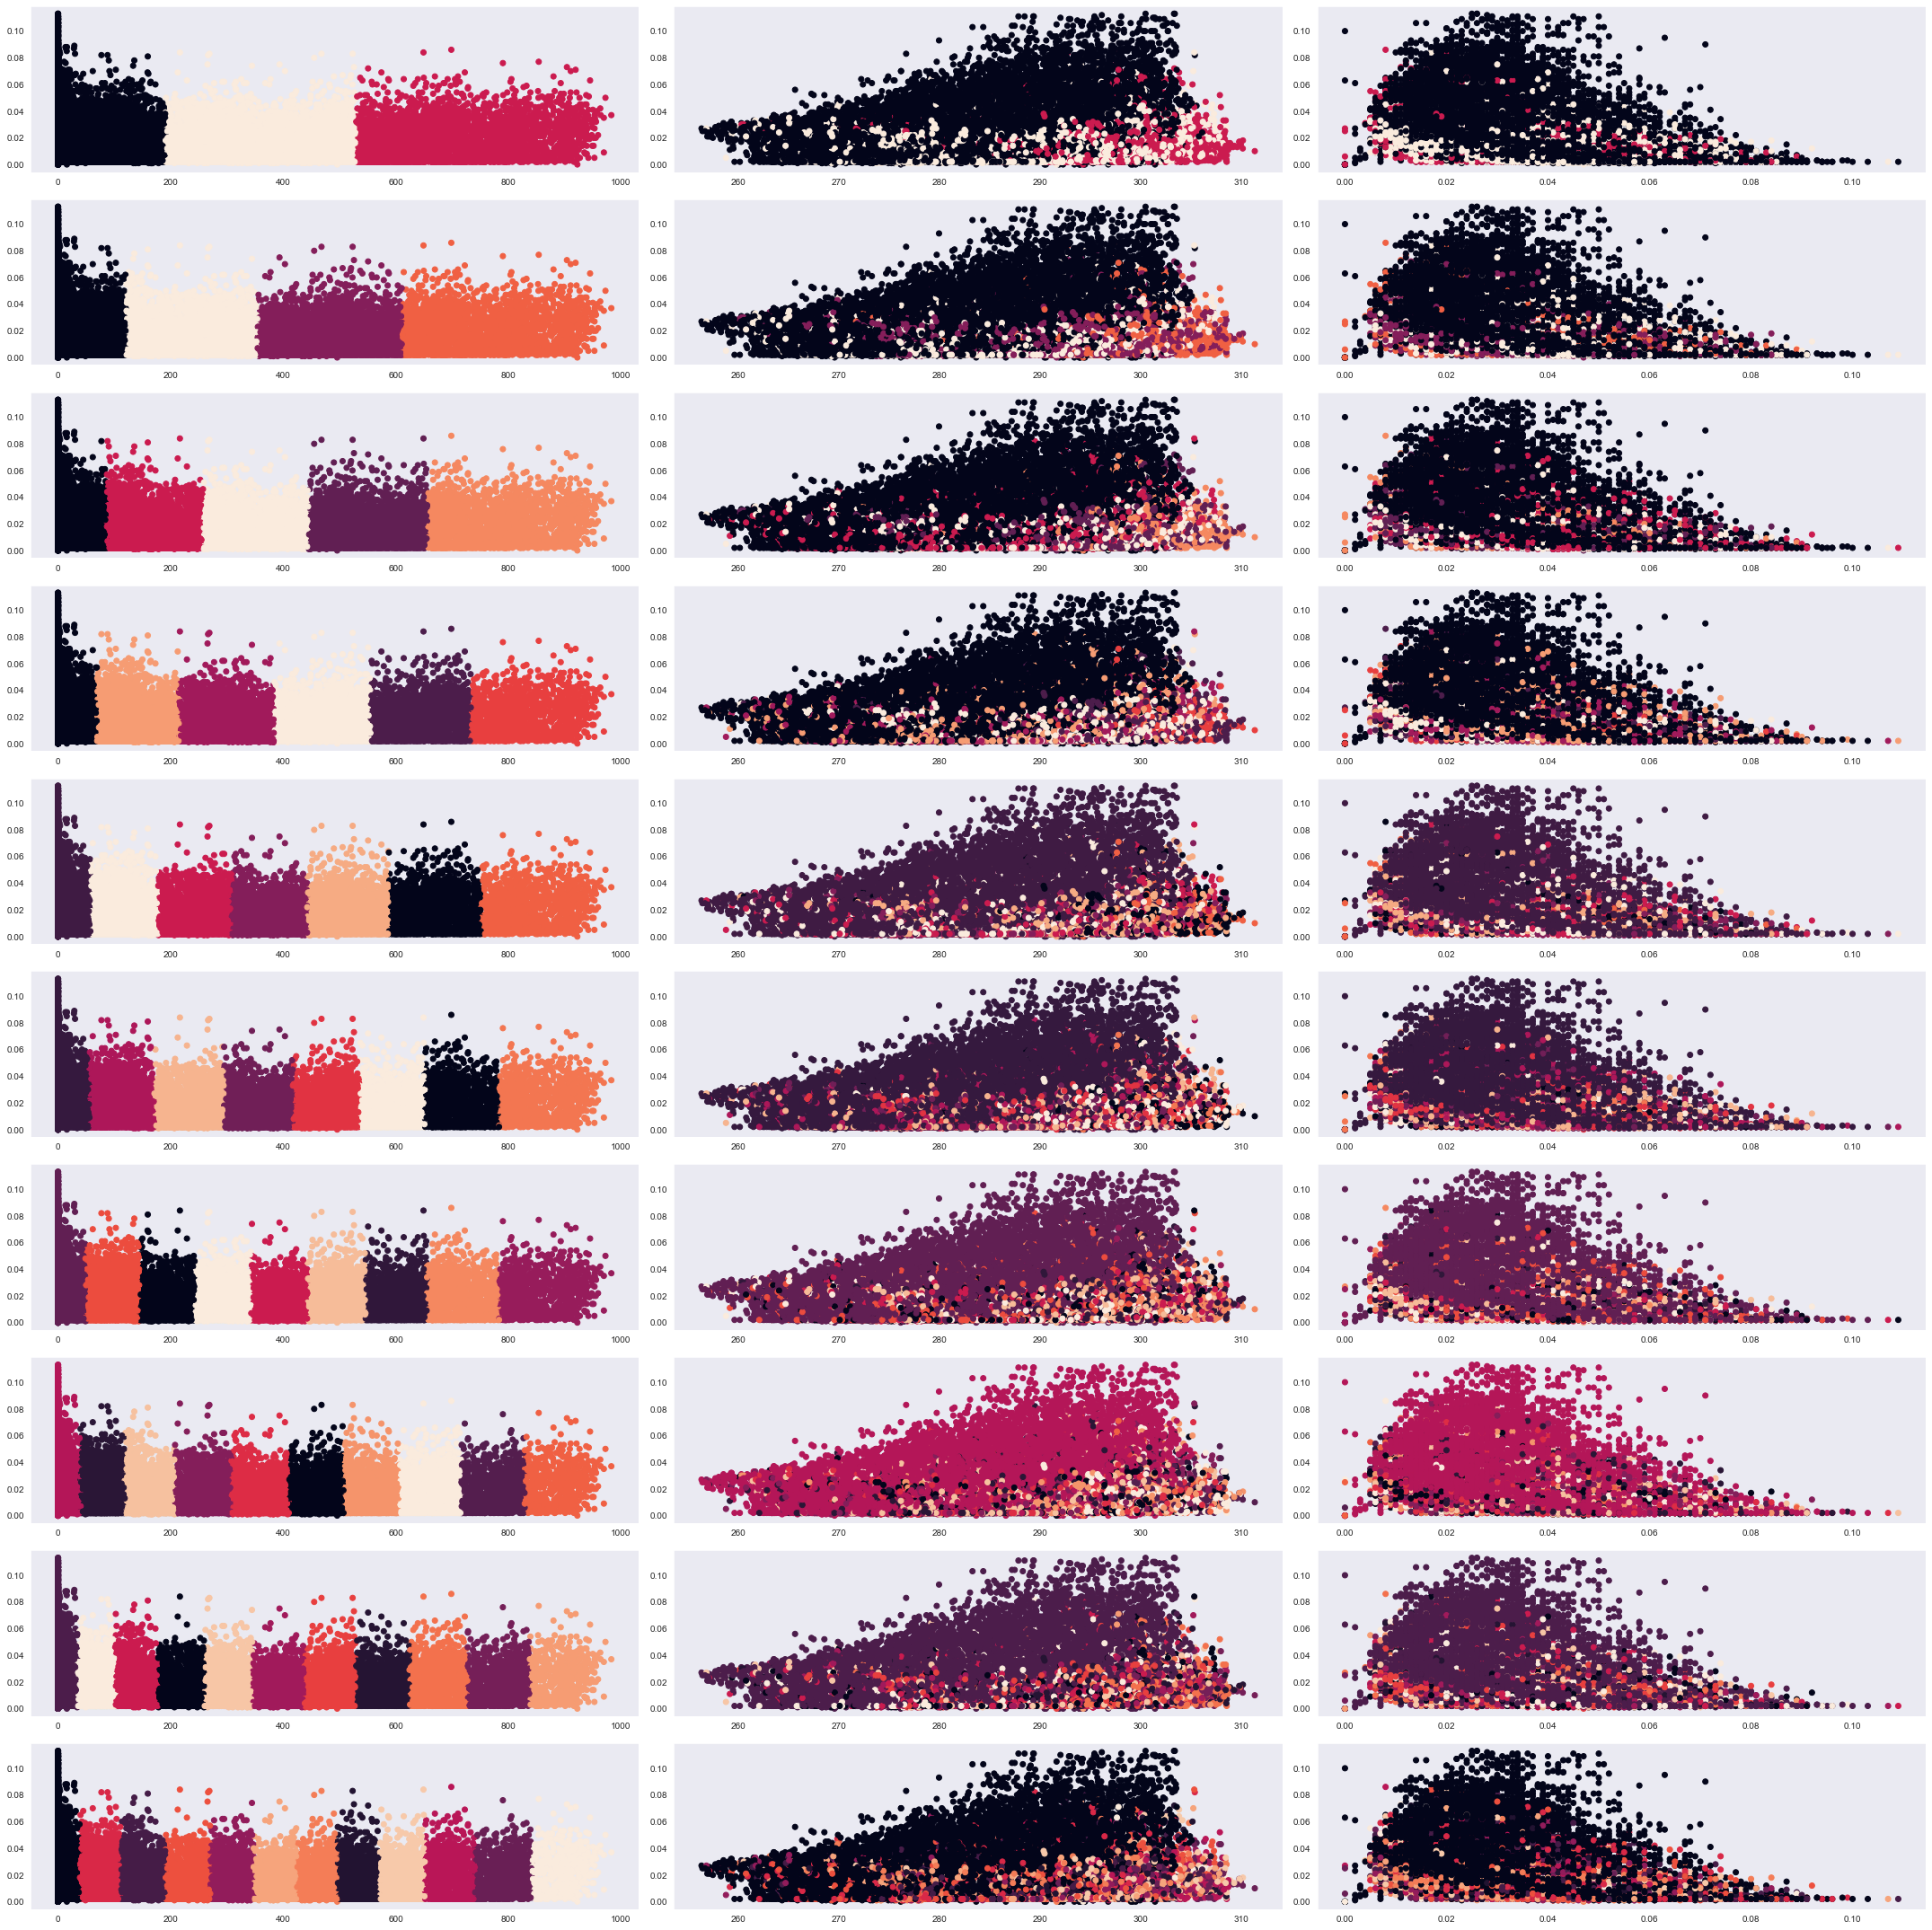

time: 15.2 s


In [44]:
from sklearn.cluster import KMeans

# .inertia_ returns the sum of squared distances of samples to their closest cluster center
# .cluster_centers_  returns array wuth coordinates of cluster centers
# .labels_ returns the cluster label of each example in order

cluster_magn = pd.DataFrame(index=range(3, 13), columns=["Magnitude"])

fig, axs = plt.subplots(10,3, figsize = (30, 30))
fig.tight_layout()

for k in cluster_magn.index:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df[["O3", "Radiation", "Temperature (K)", "NO2"]])
    clusters = kmeans.labels_
    cluster_magn["Magnitude"][k] = kmeans.inertia_
    
    cluster_sizes = []
    for i in range(k):
        cluster_sizes.append(len(np.where(clusters == i)[0]))
    
    print("\nk = ", k, "\nCluster Magnitude = ", kmeans.inertia_, "\nCluster Sizes = ", cluster_sizes)
    
    
    
    axs[k-3][0].scatter(x=df["Radiation"], y=df["O3"], c=clusters)
    axs[k-3][1].scatter(x=df["Temperature (K)"], y=df["O3"], c=clusters)
    axs[k-3][2].scatter(x=df["NO2"], y=df["O3"], c=clusters)

    
plt.show()

Text(0.5, 1.0, 'Cluster Magnitudes for Number of Clusters')

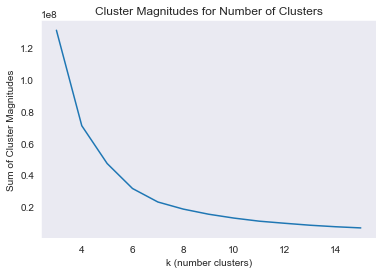

time: 90.7 ms


In [29]:
plt.plot(cluster_magn)
plt.xlabel("k (number clusters)")
plt.ylabel("Sum of Cluster Magnitudes")
plt.title("Cluster Magnitudes for Number of Clusters")

The scatterplots shows that O3 data can very clearly be clustered on the basis of radiation. I chose to cluster on radiation, temperature, and NO2 because those were the non-O3 variables that had the highest cross-correlation with O3 concentration. For the other air pollutants, clustering should be done off of different variables. This could be an argument for including pollutant-specific clusters in the data for our machine learning models as somewhat of a "derived" statistic that merges the meaning of multiple key variables into one value. 